### **EDA-4. Статистические тесты**

#### **I. Введение**

В предыдущих модулях мы познакомились с основами разведывательного анализа данных *(EDA)* и изучили базовую математическую статистику в контексте *EDA* - научились рассчитывать среднее, медиану и моду. В этом модуле мы научимся делать выводы об этих величинах, если известны данные не обо всех объектах, а только о части из них.

Представим, что перед полноценным запуском рекомендательной системы в онлайн-магазине мы протестировали её на части покупателей и увидели, что средний чек заказа вырос. Означает ли это, что мы увидим такой же результат и на других заказах? Можно ли запускать рекомендательную систему для всех покупателей?

Отвечать на подобные вопросы позволяет аппарат **статистических тестов.**

**Статистические тесты -** один из наиболее важных инструментов в *Data Science*, который позволяет проверять гипотезы и принимать решения на основе данных. Благодаря статистическим тестам можно провести анализ и сделать вывод о том, являются ли различия между двумя выборками данных случайными или обусловленными каким-то влиянием.

Нам будут встречаться разнообразные бизнес-задачи, и статистические тесты позволят избегать ошибочных решений. В примере выше благодаря статистическим тестам удастся сэкономить ресурсы компании, если окажется, что запуск рекомендательной системы на самом деле неэффективен.

Важно отметить, что статистические тесты не являются абсолютно надёжными и не всегда дают точные результаты. Чтобы правильно их использовать, требуются определённые знания, в том числе в области математической статистики. Кроме того, результаты статистических тестов могут зависеть от выбора метода и параметров, которые использовались при их проведении. Поэтому важно правильно выбирать тесты и использовать их в сочетании с другими методами анализа данных.

В этом модуле мы узнаем, как проводить статистические тесты, выбирать подходящий тест и оценивать результаты исследования.

*Модуль можно условно разделить на две части:*

* Первая посвящена теории: мы изучим основные определения и понятия, связанные со статистическими тестами.
* Во второй части мы перейдём к практическим примерам и задачам и решим их на *Python*.

**В МОДУЛЕ МЫ РАЗБЕРЁМ:**

* *что такое статистическая гипотеза*;

* *какие бывают статистические тесты*;

* *что такое значимость, уровень значимости, ошибки первого и второго рода*.

**МЫ НАУЧИМСЯ:**

* *различать типы гипотез*;

* *выдвигать собственные гипотезы*;

* *самостоятельно выбирать статистический критерий и пошагово выполнять алгоритм статистической проверки*;

* *проводить различные статистические тесты на языке Python*.

#### **II. Необходимость в статистических тестах**

Несмотря на то что статистические тесты часто используют для принятия бизнес-решений, всё же бывают ситуации, когда обращаться к ним необязательно. О таких ситуациях мы поговорим отдельно в конце модуля.

В этом и последующих юнитах мы рассмотрим случаи, когда без статистических тестов не обойтись. Для начала введём понятия *«генеральной совокупности»* и *«выборки»* - они пригодятся нам в дальнейших рассуждениях.

**Генеральной совокупностью** называется всё множество интересующих нас объектов, а **выборкой -** случайное подмножество этого множества.

Часто множество объектов генеральной совокупности настолько большое, что мы не можем посчитать все объекты. Например, все заказы в онлайн-магазине - это *генеральная совокупность*, а часть заказов - *выборка*. Мы не можем посчитать все заказы как минимум потому, что часть из них ещё не совершена.

<img src="images/Генеральнаая совокупность и выборка.png">

Мы уже знаем, что на основе выборки (части наблюдений) можно измерить следующие показатели:

* *выборочное среднее (центральная мера распределения)*;
* *выборочное стандартное отклонение* (стандартное отклонение (среднеквадратическое отклонение) - это мера "разброса" значений вокруг среднего. Чем больше разброс значений, чем больше значения признака отличаются от среднего значения, тем больше значение стандартного отконения. Напомним, что квадрат стандартного отклонения называется *дисперсией*) *(мера разброса)*;
* *выборочная пропорция* (это доля объектов из выборки, выбранных по условию, например, доля пользователей, соершивших покупки).

Однако на самом деле нас всегда интересуют параметры **генеральной совокупности:**

* *истинное среднее* - **математическое ожидание** **(μ,** *«мю»)*;
* *истинное стандартное отклонение **(σ,** «сигма»)*;
* *истинная пропорция* **(p).**

*Например*, если речь идёт о среднем чеке заказов в онлайн-магазине, то нам важно узнать его не на выборке, а на всех заказах, то есть на генеральной совокупности.

Важно помнить о разнице между выборочными статистиками и параметрами генеральной совокупности.

**Выборочная статистика -** это случайная величина, так как рассчитана на случайной выборке. *Например*, значение среднего на двух разных выборках будет разным.

**Параметр генеральной совокупности -** это константа, конкретное число, которое, как правило, нам неизвестно и никогда не станет известным.

Однако благодаря статистическим тестам мы можем делать выводы о параметрах всей генеральной совокупности, имея только выборку наблюдений.

Как это можно сделать ? Давайте разбираться.

Допустим, мы хотим увеличить средний чек заказа в онлайн-магазине, внедрив новую рекомендательную систему. Команда *Data Science* должна оценить, насколько эффективно будет работать эта система. Запускать её для всех покупателей и после этого анализировать эффективность рискованно, так как требует вложения средств. Система может оказаться неэффективной, и её массовое внедрение может привести к репутационным издержкам.

Как тогда поступить ?

**Выходом будет:**

**1.** Показать рекомендации только части покупателей (выборке).

**2.** Замерить средний чек на полученной выборке (пусть он получится равным **N** рублей).

**3.** Провести статистическое тестирование, чтобы проверить значимость полученного результата для всей генеральной совокупности. То есть мы должны понять, есть ли разница в средних чеках по всем заказам (математических ожиданиях) до и после внедрения рекомендательной системы.

**4.** Сделать вывод, запускать ли рекомендательную систему на весь магазин.

<img src="images/Средний чек в выборке-1.png">

Почему нельзя просто сделать вывод, что если средний чек в выборке равен **N** рублей, то он также будет равен **N** рублей на всех заказах ? Потому что, возможно, значения, полученные на выборке, не отражают значения на генеральной совокупности. Например, на рисунке ниже средний чек заказов в выборке меньше, чем средний чек по всем заказам.

<img src="images/Средний чек в выборке-2.png">

* Если бы мы запустили рекомендательную систему сразу на всех покупателей онлайн-магазина, то узнали бы, эффективна ли она, без статистических тестов, так как измерили бы все объекты в генеральной совокупности. Однако в случае неэффективности системы было бы уже поздно что-то менять, так как ресурсы компании уже потрачены на её внедрение.
* Если бы мы запустили рекомендательную систему только для части покупателей, но не провели статистические тесты, полученные выводы нельзя было бы распространить на все заказы.

**Резюмируем:**

* Статистические тесты позволяют сделать выводы о всей генеральной совокупности по выборке.
* Статистические тесты нужны в случаях, когда мы не можем измерить все объекты в генеральной совокупности.
* Без статистических тестов выводы, полученные на выборке, нельзя распространить на всю генеральную совокупность.

**Задание 1.**

Для представленных ниже случаев определим, когда статистические тесты необходимы, а когда выводы можно сделать без них.

**Мы можем измерить все элементы генеральной совокупности, и статистические тесты не нужны - и это:**
* *Мы разработали новый вид лекарства и хотим узнать, будет ли оно эффективно на конкретной группе людей*.

**Мы не можем измерить все элементы генеральной совокупности, и статистические тесты нужны - и это:**
* *Мы разработали новый вид лекарства и хотим узнать, будет ли оно работать на всех людях*.

#### **III. Понятие статистической гипотезы**

Итак, мы разобрались, в каких случаях необходимы статистические тесты. Настала пора знакомиться с ними, и мы начнём с важнейшего для статистических тестов понятия - статистической гипотезы.

**Статистическая гипотеза -** это некоторое утверждение о параметрах генеральной совокупности, которое мы будем проверять на основе данных выборки. Например, утверждение «рекомендательная система влияет на средний чек покупки» - это статистическая гипотеза.

*Примечание.* Здесь и далее под «средним чеком покупки» мы будем иметь в виду средний чек на всей генеральной совокупности, то есть математическое ожидание среднего чека.

**АЛГОРИТМ ПРОВЕРКИ СТАТИСТИЧЕСКИХ ГИПОТЕЗ**

*Общий алгоритм проверки гипотезы состоит из шести этапов:*

**1.** Построение нулевой и альтернативной гипотез.

**2.** Выбор уровня значимости **α.**

**3.** Сбор данных для проверки гипотезы.

**4.** Выбор статистического теста.

**5.** Проведение статистического теста, вычисление *p-value*.

**6.** Сравнение *p-value* c уровнем значимости **α** и вывод, отклонить или не отклонить нулевую гипотезу.

Далее мы подробно рассмотрим каждый из них.

**НУЛЕВАЯ И АЛЬТЕРНАТИВНАЯ ГИПОТЕЗЫ**

Проведение статистических тестов начинается с формулирования двух конкурирующих между собой статистических гипотез - **нулевой** и **альтернативной.**

<img src="images/Нулевая и альтернативная гипотезы-1.png">

В ходе статистических тестов мы будем проверять нулевую гипотезу. Возможен один из двух результатов:

* **отклоняем нулевую гипотезу** в пользу альтернативной (делаем вывод, что эффект есть);
* **не отклоняем нулевую гипотезу,** так как для этого недостаточно оснований (нельзя сделать вывод о наличии эффекта).

**Существует три варианта формулировки нулевой и альтернативной гипотез.** Давайте рассмотрим формулировки вместе с их математической интерпретацией. Пусть **μ1 -** средний чек покупки без просмотра рекомендаций, **μ2 -** средний чек покупки после просмотра рекомендаций.

**Примечание.** Ещё раз отметим, что **μ1** и **μ2 -** средние значения чека на двух генеральных совокупностях (заказах до и после внедрения рекомендательной системы), т.е. они отражают средние чеки на всех покупках в онлайн-магазине и являются теоретическими величинами, измерить которые мы не можем.

Однако мы можем составить следующие бизнес-вопросы и соответствующие им гипотезы:

<img src="images/Бизнес-вопросы и гипотезы.png">

Рассмотрим тонкости формулировок гипотез более подробно.

**1.** В качестве первого примера возьмём наш кейс с внедрением рекомендательной системы. Предположим, мы хотим ответить на вопрос «Увеличится ли средний чек покупки после просмотра рекомендаций ?».

*Нулевая и альтернативная гипотезы будут следующими:*

<img src="images/Нулевая и альтернативная гипотезы-2.png">

Пусть мы сделали две выборки покупок (без и после просмотра рекомендаций) и получили следующие средние значения чека:

* без просмотра рекомендаций **- m1 = 960 рублей;**

* после просмотра рекомендаций **- m2 = 1250 рублей.**

Проверка этих гипотез позволит определить, существует **(статистически значима)** ли разница в размере чеков в **290 рублей** на генеральных совокупностях. То есть мы пытаемся выяснить, справедливо ли утверждение о генеральных совокупностях, основываясь только на выборочных значениях **m1** и **m2.**

**2.** Представим, что мы работаем аналитиками в компании, которая производит кулинарные соусы. Недавно мы запустили новый продукт на рынок, и нам необходимо выяснить, соответствует ли качество соуса показателям, заявленным на упаковке. Мы знаем, что содержание натрия должно быть не более **300 мг на 100 г соуса,** и хотим проверить, не превышено ли оно.

С точки зрения статистики это утверждение будет значить, что на генеральной совокупности среднее (математическое ожидание) содержание натрия **(μ)**, должно быть меньше или равно **300 мг на 100 г.**

*Тогда нулевая и альтернативная гипотезы будут следующими:*

<img src="images/Нулевая и альтернативная гипотезы-3.png">

Для проверки этих гипотез мы делаем случайную выборку из бутылок соуса и измеряем содержание натрия в каждой из них. Предположим, что среднее значение содержания натрия в выборке составило **m = 305 мг на 100 г соуса.**

Проверив гипотезы, мы сможем понять, действительно ли среднее значение содержания натрия **(μ)** отличается от заявленного на упаковке. Возможно, что измеренное нами выборочное значение **m** является следствием погрешностей и случайностей.

Как видно, в приведённых выше примерах постановка задач и формулировка гипотез отличаются:

* В первом случае нам необходимо было сравнить два средних на двух генеральных совокупностях на основе данных из двух выборок.
* Во втором случае мы имели дело с одной выборкой и хотели проверить соответствие математического ожидания требуемому показателю.

Почему это важно ? Далее мы увидим, что один из критериев выбора статистического теста, — это количество групп (выборок). Например, в первом случае мы будем выбирать среди двухвыборочных тестов, а во втором — среди одновыборочных.

Итак, мы разобрали понятие статистической гипотезы и её основные виды: нулевую и альтернативную гипотезы. **Нулевая гипотеза -** это утверждение об отсутствии эффекта, который мы хотим проверить, а **альтернативная -** утверждение о наличии такого эффекта.

Закрепим полученные знания с помощью небольшого теста.

**Задание 2.** 

Какая гипотеза обычно утверждает равенство параметров выборки (отсутствие эффекта) ?
* *Нулевая*.

**Задание 3.** 

Какая из представленных ниже гипотез **не** является корректной нулевой гипотезой ?
* **μ1 -** среднее время выздоровления пациентов, не принимающих лекарство;
* **μ2 -** среднее время выздоровления пациентов, принимающих лекарство.

*Ответ:* **H₀: μ₁ > μ₂**

**Задание 4.**

Необходимо соотнести формулировки вопросов от бизнеса и формулировки гипотез, которые нужно сделать.

* **μ₁ -** среднее время выздоровления пациентов, не принимающих лекарство; 
* **μ₂ -** среднее время выздоровления пациентов, принимающих лекарство.

**Подсазка:** Нулевая гипотеза содержит утверждение об отсутствии интересующего нас эффекта от лекарства, а альтернативная гипотеза - о наличии этого эффекта.

**1.** Влияет ли приём лекарства на время выздоровления пациентов ?

*Ответ:* 
* **H₀: μ₁ = μ₂**
* **H₁: μ₁ ≠ μ₂**

**2.** Увеличивает ли приём лекарства время выздоровления пациентов ?

*Ответ:*
* **H₀: μ₁ ≥ μ₂**
* **H₁: μ₁ < μ₂**

**3.** Уменьшает ли приём лекарства время выздоровления пациентов ?

*Ответ:*
* **H₀: μ₁ ≤ μ₂**
* **H₁: μ₁ > μ₂**

#### **IV. Статистическая значимость**

Наша задача как профессионалов в анализе данных — уметь корректно формулировать гипотезы, проверять их на имеющихся данных и объяснять результаты команде. Однако от нас требуется не только определить, подтверждают ли гипотезу имеющиеся данные, но и ответить на вопрос, насколько мы уверены в своём заключении, иными словами  насколько **статистически значимы** полученные нами результаты.

Чтобы ответить на этот вопрос, нужно понять, какие ошибки мы можем допустить при проверке гипотез, а также познакомиться с понятием статистической значимости *(p-value)*.

**ОШИБКИ I И II РОДА**

При проверке гипотезы возможно допустить ошибку одного из двух видов:

* **Ошибка I (первого) рода:** *отклонение нулевой гипотезы, когда она на самом деле верна. Эта ошибка также называется - ошибкой, или ложноположительным результатом*.
* **Ошибка II (второго) рода:** *неотклонение нулевой гипотезы, когда она на самом деле ложна. Эта ошибка также называется - ошибкой, или ложноотрицательным результатом*.

<img src="images/Ошибка I и II рода.png">

Как мы понимаем, каждая из ошибок при проверке гипотезы может привести к определённым последствиям, которые важно учитывать при проведении тестирования гипотез.

**Примечание.** Вероятность не допустить **ошибку II рода (1 - β)** ещё называют **мощностью теста.** *Например*, если мощность теста составила **0.93,** это значит, что вероятность того, что была допущена **ошибка II рода,** составляет **0.07 (7 %).**

**Примечание.** **Ошибки первого и второго рода -** *предмет активных исследований дата-сайентистов при решении задач классификации, когда необходимо оценить качество алгоритма.*

В задаче бинарной классификации (разделении наблюдений на два класса) можно также совершить два вида ошибок. *Например*, если мы строим алгоритм, который классифицирует банковские транзакции на «стандартные» *(класс 0)* и «подозрительные/мошеннические» *(класс 1)*, то этот алгоритм может:

* Отнести образец к *классу 1*, когда он на самом деле относится к *классу 0*. То есть банковская система может признать транзакцию подозрительной, когда она является стандартной. **Это ошибка первого рода.**
* Не отнести образец к *классу 0*, когда он на самом деле относится к *классу 1*. То есть банковская система может не признать транзакцию подозрительной, когда она является таковой. **Это ошибка второго рода.**

Данные, размеченные на два класса, используют в специальных алгоритмах машинного обучения, чтобы сформировать предсказания на новых данных. Подробнее об этом мы узнаем в модулях по машинному обучению.

**Задание 5.**

Исследуя новое лекарство, мы сделали вывод, что оно уменьшает время выздоровления пациентов.

Пусть **μ₁ -** среднее время выздоровления пациентов до приёма лекарства, а **μ2 -** после его приёма. Нулевая и альтернативная гипотезы состояли в следующем:

* **H₀: μ₁ ≤ μ₂ -** время выздоровления пациентов после приёма лекарства не изменилось или увеличилось.
* **H₁: μ₁ > μ₂ -** время выздоровления пациентов после приёма лекарства уменьшилось.

Однако, выпустив лекарство на рынок, мы поняли, что время выздоровления пациентов не уменьшилось.

Ошибку какого рода мы допустили ?

*Ответ:* **I рода** *(Ошибка I рода возникает при отклонении нулевой гипотезы, когда она верна. В нашем примере нулевая гипотеза - «Новое лекарство не влияет на время выздоровления», и мы ошибочно отвергли её)*.

**Задание 6.**

Для приведённых ниже бизнес-вопросов самостоятельно сформулируем нулевую и альтернативную гипотезы, а также смысл ошибок первого и второго рода:

* Уменьшается ли время ответа техподдержки благодаря использованию нового классификатора запросов ?
* Увеличивается ли время работы изделий при использовании материалов от нового поставщика ?

*Ответ:*

<img src="images/Задание на самопроверку.png">

**СТАТИСТИЧЕСКАЯ ЗНАЧИМОСТЬ (P-VALUE)**

Мы разобрались, что может пойти не так при проверке гипотезы. Вернёмся к понятию статистической значимости.

Для визуализации идеи статистической значимости мы будем использовать график плотности распределения вероятности, а именно **график оценки плотности ядра** *(Kernel Density Estimation, KDE)*. Он представляет собой непрерывную кривую, которая показывает распределение значений, и выглядит как сглаженная гистограмма. По такому графику проще понять форму распределения (пики, симметричность), чем по гистограмме.

По оси **x** отложено значение случайной величины (*например*, размера чека), а по оси **y -** плотность вероятности (чем больше **y,** тем больше вероятность наблюдать значение по оси **х**).

Примеры графиков плотности распределения вероятности (оранжевые) с соответствующими гистограммами:

<img src="images/Статистическая значимость.png">

График плотности вероятности построен так, что вся площадь под кривой равна **1 -** это вероятность всех возможных значений размера чека. Это следует из основного правила теории вероятностей: *сумма вероятностей всех исходов (всех возможных значений чека) всегда равна* **1.**

Площадь под кривой на интервале от **a** до **b** (голубая область) соответствует вероятности получить среднее значение от **a** до **b** (на графике ниже такая вероятность **~ 0.3):**

<img src="images/График плотности.png">

Например, если **a = 350**, а **b = 500**, это значит, что вероятность того, что средний чек покупки в онлайн-магазине находится в диапазоне **от 350 до 500 рублей** составляет **0.3.**

Теперь мы, наконец, готовы ввести понятие **p-value.**

Уровнем **статистической значимости** *(p-value, p-значением)* называется **вероятность получить наблюдаемые или более экстремальные значения при условии, что нулевая гипотеза верна.**

Рассмотрим это определение на примере ответа на вопрос *«Средний чек покупки в онлайн-магазине больше 500 рублей ?»*. Гипотезы будут следующими:

<img src="images/Нулевая и альтернативная гипотезы-4.png">

Сначала допустим, что **верна нулевая гипотеза:** средний чек покупки (на генеральной совокупности) **меньше или равен 500 рублей.**

Нам неизвестно, какой будет истинная форма плотности вероятности чека, которая получается на основе генеральной совокупности. Обычно предполагают какую-то форму из стандартных законов распределений, например, из нормального закона распределения, как на графике ниже (о нормальном распределении и его свойствах мы поговорим далее). Синяя пунктирная линия соответствует среднему чеку в **500 рублей,** вокруг которого мы строим нулевую гипотезу:

<img src="images/Нулевая и альтернативная гипотезы-5.png">

<img src="images/Нулевая и альтернативная гипотезы-6.png">

Чем больше было бы число, которое мы получили на выборке:

* тем меньше была бы площадь под кривой, т.е. меньше полученное значение *p-value*;
* тем меньше полученное наблюдение соответствовало бы нулевой гипотезе, согласно которой среднее значение чека - **500 рублей или меньше.**

Важно понимать, что *p-value -* это именно вероятность получить наблюдаемые или более экстремальные значения, если верна нулевая гипотеза, а не вероятность верности нулевой гипотезы.

Следующее необходимое нам понятие - **уровень значимости.**

**Уровень значимости -** это пороговая вероятность допустить **ошибку I рода** *(вероятность отклонить нулевую гипотезу, когда она верна)*. Обычно это число обозначается за **α.**

Если полученное значение *p-value* меньше заранее заданного уровня значимости **α,** мы отвергаем *нулевую гипотезу*. В таком случае принято говорить, что мы обнаружили статистически значимый эффект. Чаще всего в бизнесе берут **α = 0.05.** Это означает, что мы готовы к **5 % риску допустить ошибку I-ого рода** *(т.е. сделать вывод, что эффект есть, хотя на самом деле его нет)*.

*Итак:*

* Если полученное *p-value* **ниже уровня значимости (p < α),** *результаты статистически значимы и согласуются с альтернативной гипотезой*.
* Если полученное *p-value* **выше уровня значимости (p > α),** *результаты считаются статистически незначимыми, нельзя отвергнуть нулевую гипотезу*.

**Примечание.** Если *p-value* **равно уровню значимости (p = α),** то возникает дилемма: *принять нулевую гипотезу или отвергнуть её в зависимости от предварительных условий*. На практике, если не оговорено других предварительных условий, в большинстве случаев нулевую гипотезу отвергают, если **p ≤ α.**

*Иллюстрация принятия решения для проверки гипотезы:*

<img src="images/Принятие решения для проверки гипотезы-1.png">

**Примечание.** Раньше специалисты по статистике вручную рассчитывали *p-value* по измеренным данным и анализировали результаты по специальным справочникам с таблицами распределения. Теперь мы можем просто воспользоваться готовыми функциями из библиотек **SciPy** и **Statsmodels** для языка *Python*. Эти функции мы ещё разберём далее в модуле, а в этом юните опустим детали получения *p-value*.

В нашем примере **p-value = 0.03** (пока мы опустили детали вычисления). Это означает, что, если нулевая гипотеза верна, вероятность получить на выборке чек, который больше среднего чека на **200 и более рублей,** составляет **0.03.** Иллюстрация выглядит так:

<img src="images/Принятие решения для проверки гипотезы-2.png">

Площадь жёлтой области равняется **p-value (0.03),** площадь красной области равняется **α (0.05).** **P-value меньше α -** значит, мы можем отвергнуть нулевую гипотезу в пользу альтернативной и сказать, что средний чек покупки **больше 500 рублей.**

Далее потренируемся в принятии решений.

**Задание 7.**

Какие утверждения были бы верными, если бы в описанном выше примере **p-value равнялось 0.2,** а остальные условия были такими же ?

*Напомним нулевую и альтернативную гипотезы:*

* **H₀: μ₁ ≤ 500 -** средний чек покупки меньше или равен 500 рублям.
* **H₁: μ₁ > 500 -** средний чек покупки больше 500 рублей.

<img src="images/Задание 7.png">

*Ответ:*
* **Мы не отклоняем нулевую гипотезу, так как у нас недостаточно оснований для этого** *(p-value = 0.20. Это больше порога в 0.05. Значит, у нас недостаточно оснований отклонить нулевую гипотезу).*
* **При условии, что нулевая гипотеза верна, вероятность получить различие в 100 рублей в размере среднего чека составляет 0.20** *(На этой выборке вероятность получить различие в 100 рублей в размере среднего чека составляет 0.20 при условии, что нулевая гипотеза верна)*.

**α ПРИ ОДНОСТОРОННИХ И ДВУСТОРОННИХ ГИПОТЕЗАХ**

**! Ещё раз о видах гипотез:**

<img src="images/Виды гипотез.png">

<img src="images/Иллюстрация для левосторонней гипотезы.png">

<img src="images/Иллюстрация для двусторонней гипотезы.png">

Получается, что мы отвергаем двустороннюю гипотезу при более несовместимых с нулевой гипотезой данных, так как смотрим на различия в обе стороны - и в большую, и в меньшую. В каждой из сторон мы смотрим на более экстремальные значения, чем при односторонних гипотезах.

**КАК ВЫБРАТЬ α ?**

Уровень значимости **α** используют как порог для принятия решений, задающий приемлемый уровень **ошибки I рода.** *Например*, **α = 0.05** означает, что мы готовы к риску в **5 %** случаев сделать вывод о существовании искомого эффекта, когда в реальности его нет.

Значение  необходимо выбрать до начала исследования совместно с бизнес-заказчиком. Единственно верного значения **α** не существует - оно зависит от бизнес-задачи. **Обычно выбирают 0.01, 0.05 или 0.10.**

**Примечание.** При решении задач в этом модуле мы всегда будем использовать уровень значимости **α = 0.05.**

Иллюстрация соотношения наиболее популярных значений **α:**

<img src="images/Иллюстрация соотношения значений α.png">

Чем более нежелательно допустить **ошибку I рода,** тем меньшее значение **α** стоит выбирать. *Например*, уровень значимости при испытаниях нового автомобильного оборудования будет ниже, чем уровень значимости при исследовании новой версии сайта.

Возникает вполне логичный вопрос: почему бы не принять **α = 0,** тем самым исключив возможность ошибки ?

Увы, всё не так просто. Дело в том, что, помимо **α,** мы должны учитывать и **β -** вероятность **ошибки II рода** *(риск ложноотрицательного результата)*. Две этих величины противоречат друг другу. Предположим, вы хотите минимизировать ошибку первого рода. Тогда можно всегда принимать нулевую гипотезу **H₀** вне зависимости от наблюдаемых данных - **ошибки I рода** не случится. Однако такое решение будет поднимать вероятность **ошибки II рода** *(ошибки принятия нулевой гипотезы, когда она на самом деле ложна)*. Компромисс между этими параметрами показан ниже.

<img src="images/Вероятность ошибок I и II рода.png">

На рисунке выше мы видим две кривые: **синим** *показана вероятность получить наблюдаемые данные, если верна нулевая гипотеза;* **зелёным -** *вероятность получить их, если верна альтернативная гипотеза*. **Ошибки I и II рода** возникают там, где эти два распределения перекрываются. *Например*, в точке пересечения **зелёной** и **синей** линий вероятности получить наблюдаемые данные равны - выбрать между гипотезами будет затруднительно.

Область, заштрихованная **синим** цветом, представляет собой **α -** *вероятность ошибки I рода*, а область, заштрихованная **зелёным** цветом - **β,** *вероятность ошибки II рода*. Установив частоту *ошибок I рода*, вы также косвенно влияете на частоту *ошибок II рода*.

В этом юните мы познакомились с понятием статистической значимости и узнали, как определять уровнь значимости **α -** *это шаг 2 алгоритма проверки статистических гипотез*.

**Задание 8.**

Ниже представлены карточки с ролями. Представим себя в каждой роли и сопоставим ситуацию и подходящее значение параметра:

<img src="images/Задание 8.png">

#### **V. Статистические тесты: введение**

Предыдущий юнит был посвящён выбору статистической значимости. В этом мы разберём выбор статистического теста - **это шаг 4 в алгоритме проверки статистической гипотезы.**

**ОСНОВНЫЕ ТИПЫ СТАТИСТИЧЕСКИХ ТЕСТОВ**

Существует множество статистических тестов. Задача дата-сайентиста в том, чтобы выбрать подходящий тест и провести его, получив на выходе *p-value*. Далее мы разберём, от чего зависит выбор теста, а также их основные типы.

Вспомним, что признаки объектов, которые мы анализируем, делятся на **количественные** и **категориальные.**

<img src="images/Типы статистических тестов.png">

*Для разных типов признаков используются разные статистические тесты.*

Далее мы будем говорить о статистических тестах для **количественных признаков,** так как они состоят из большего числа этапов и задачи с количественными признаками чаще встречаются на практике. Тесты для категориальных признаков мы рассмотрим в юните *«Статистические тесты для категориальных признаков»*.

**Выбор статистического теста для количественных признаков зависит от ряда факторов:**

* *количества анализируемых групп (выборок): одна, две, три и более групп*;
* *зависимости групп: зависимые и независимые*;
* *знания о распределении признаков по нормальному закону*.

Ниже мы рассмотрим каждый из этих факторов.

**КРИТЕРИЙ ВЫБОРА ТЕСТА: КОЛИЧЕСТВО ГРУПП**

По количеству анализируемых групп тесты делятся на **одновыборочные, двухвыборочные и многовыборочные.**

<img src="images/Количество сравниваемых групп.png">

Количество групп определяется значением фактора, влияние которого мы анализируем, *например*:

* Чтобы определить, достигается ли целевой показатель «среднее время посещения сайта - пять минут», понадобится случайным образом набрать из посетителей этого сайта одну группу.
* Для определения эффекта от лекарства понадобится две группы: пациенты, не принимающие лекарство (контрольная группа), и пациенты, принимающие его (тестовая группа).
* Чтобы выяснить, влияет ли цвет машины на её стоимость, понадобится количество групп, равное анализируемому количеству цветов: белый, чёрный, красный, серый и т.д.

<img src="images/Тип теса и примеры задачи.png">

**Задание 9.**

Соотнесем бизнес-задачи с необходимым для них видом теста:

<img src="images/Задание 9.png">

**КРИТЕРИЙ ВЫБОРА ТЕСТА: ЗАВИСИМОСТЬ ГРУПП**

Сравниваемые группы могут быть **независимыми** и **зависимыми.**

<img src="images/Зависимость групп.png">

**Задание 10.**

Соотнесем бизнес-задачи с необходимым для них видом теста:

<img src="images/Задание 10.png">

**Задание 11.**

Соотнесем бизнес-задачи с параметрами для выбора статистического теста:

<img src="images/Задание 11.png">

**КРИТЕРИЙ ВЫБОРА ТЕСТА: РАСПРЕДЕЛЕНИЕ ПРИЗНАКА ПО НОРМАЛЬНОМУ ЗАКОНУ**

Если признаки *распределены по нормальному закону*, к ним можно применять **параметрические тесты -** статистические методы, основанные на параметрах нормального распределения (среднее значение, стандартное отклонение).

Если мы знаем, что признаки *не распределены нормально или у нас нет информации об их распределении*, необходимо использовать **непараметрические тесты.** Их можно применять на любых количественных признаках независимо от вида их распределения. *Непараметрические методы менее чувствительны к выбросам в данных.*

<img src="images/Признак распределен по нормальному закону.png">

*Непараметрические методы можно применять и на нормально распределённых данных, но в таком случае они будут менее мощными (будут обладать меньшей мощностью теста), чем параметрические.*

**АЛГОРИТМ ВЫБОРА ТЕСТА ДЛЯ КОЛИЧЕСТВЕННЫХ ПРИЗНАКОВ**

Ранее мы рассмотрели факторы, влияющие на выбор статистического теста. Объединив эти факторы, мы получим следующий алгоритм выбора статистического теста для одного количественного признака:

<img src="images/Алгоритм выбора теста для количественных признаков.png">

*Например*, в задаче, зависит ли средний чек покупки от пола покупателей, шаги по выбору теста будут такими:

* Какой тип у признака «средний чек» ? 

    **→ Количественный.**
* Сколько сравниваемых групп ?

    **→ Две** *(мужчины и женщины)*.
* Группы зависимы ?

    **→ Нет, так как объекты в выборках не повторяются.**
* Признак распределён по нормальному закону ?

    **→ Если да, нужен двухвыборочный t-критерий.**
    
    **→ Если нет, нужен U-критерий Манна - Уитни.**

**Примечание.** *Двухвыборочный t-критерий, U-критерий Манна - Уитни и другие приведённые в алгоритме статистические тесты мы рассмотрим в следующих юнитах.*

В алгоритме указано по одному, наиболее популярному, тесту для каждой ситуации. На самом деле видов статистических тестов больше - они различаются предположениями о данных и принципом работы. Одну и ту же задачу можно решить с помощью нескольких видов тестов.

**Примечание.** Для сравнения групп одновременно по нескольким признакам используют методы двумерного и многофакторного анализа, например, регрессионный анализ, многофакторный дисперсионный анализ и др.

**Пример бизнес-задачи:** оценка влияния уровня образования (среднее профессиональное, высшее, научная степень) на зарплату и число полётов за границу в год.

**Задание 12.**

Отметим параметры, которые влияют на выбор статистического теста:


* *Знание о распределении признаков по нормальному закону*.
* *Количество анализируемых групп*.
* *Зависимость групп*.
* *Тип признака*.

**Задание 13.**

Компания закупает для своих устройств батареи у определённого производителя. Производитель утверждает, что батареи работают 40 часов. Компания хочет проверить, отличается ли время работы батарей от 40 часов.

Какой статистический тест можно использовать для ответа на этот вопрос ?

*Ответ:* **Одновыборочный t-критерий.**

**Задание 14.**

Фармацевтическая компания исследует, одинаково ли эффективно работает лекарство от простуды на пациентах разных возрастов: 25-50 лет, 51-75 лет, 76-100 лет. В качестве меры эффективности выбрано время выздоровления.

Какой статистический тест можно использовать для ответа на этот вопрос ?

*Ответ:* **Критерий Краскела - Уоллиса.**

В этом юните мы разобрали общий алгоритм проверки статистических гипотез и научились выбирать подходящий статистический тест. В следующем юните мы узнаем, как проверить распределение признаков на нормальность.

#### **VI. Проверка на нормальность**

В предыдущем юните мы говорили, что для выбора между **параметрическими** и **непараметрическими тестами** необходимо проверить распределение признаков на **нормальность.** Сейчас мы узнаем, что такое нормальное распределение, почему оно так важно для нас и как проверить, подчиняется ли распределение данных нормальному закону.

Начиная с этого раздела, мы будем практиковаться на *Python*. Для этого нам понадобятся две новых библиотеки:

* **SciPy -** *библиотека для научных и инженерных расчётов*.
* **Statsmodels -** *библиотека для статистических исследований*.

**НОРМАЛЬНОЕ РАСПРЕДЕЛЕНИЕ**

Многие процессы в природе следуют нормальному закону распределения: *рост человека, вес при рождении, артериальное давление, размер ноги и др.*

На курсе вы уже сталкивались с понятием нормального распределения и некоторыми теоремами и правилами, основанными на особенностях нормального распределения. В частности в модуле *«Очистка данных»* мы изучали метод **z-отклонений (трёх сигм)** и **метод Тьюки** для поиска выбросов - они работают только для нормально распределённых данных*.

**Нормальное распределение (распределение Гаусса) характеризуется двумя числами:**

* средним значением **μ (mu);**
* стандартным отклонением **σ (sigma).**

Примеры нормальных распределений с разными **μ и σ:**

<img src="images/Примеры нормальных распределений.png">

Как мы можете увидеть, вне зависимости от значений параметра среднего и стандартного отклонения нормальное распределение визуально напоминает колокол (или шляпу).

**Любое нормальное распределение обладает следующими свойствами:**

* *Один пик в центре и симметричные боковые стороны (одномодальное распределение)*.
* *Среднее и медиана равны и расположены в центре распределения*.
* *Отклонение значений от среднего подчиняется правилу трёх сигм*:
    * **68 %** *значений находятся в пределах одного стандартного отклонения от среднего*;
    * **95 %** *значений - в пределах двух стандартных отклонений*;
    * **99.7%** *значений - в пределах трёх стандартных отклонений*.

<img src="images/Свойства нормального распределения.png">

**ГРАФИЧЕСКИЕ МЕТОДЫ ПРОВЕРКИ НА НОРМАЛЬНОСТЬ**

**ГИСТОГРАММА**

Если гистограмма имеет вид колокола, то мы считаем, что данные в выборке распределены нормально:

<img src="images/Гистограмма для нормального распределения выборки.png">

Напомним, что в *Python* гистограмму можно построить с помощью функции **histplot()** пакета *seaborn*. Параметр **kde=True** добавляет к гистограмме график оценки плотности ядра.

Рассмотрим эту функцию на примере датасета *California Housing*, входящего в состав *sklearn*. Построим гистограмму распределения целевого признака - стоимости домов:

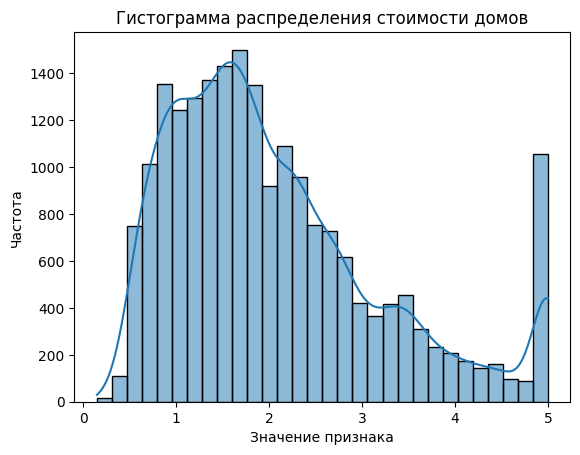

In [10]:
# импортируем библиотеки
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt
import seaborn as sns

# загружаем данные
dataset = datasets.fetch_california_housing()
data = dataset.target

# задаём параметры гистограммы
ax = sns.histplot(data, bins=30, kde=True)
ax.set(xlabel='Значение признака', ylabel='Частота')
plt.title('Гистограмма распределения стоимости домов')

# отображаем гистограмму
plt.show()

Форма гистограммы *несимметрична*, с двумя пиками. Отсюда делаем промежуточный вывод: *распределение стоимости домов не является нормальным*.

**КВАНТИЛЬ-КВАНТИЛЬ ГРАФИК**

**Квантиль-квантиль график (Q-Q Plot)** визуализирует, насколько распределение выборки близко к нормальному. График показывает взаимное расположение квантилей наблюдаемого и теоретического нормального распределения. Хороший гайд по **Q-Q Plots.**

*Если все точки лежат вдоль диагонали, то мы считаем, что данные в выборке распределены нормально:*

<img src="images/Квантиль-квантиль график.png">

В *Python* *квантиль-квантиль график* можно построить с помощью функции **qqplot()** пакета *statsmodels*. Построение квантиль-квантиль графика мы также рассмотрим на примере стоимости домов из датасета *California Housing*:

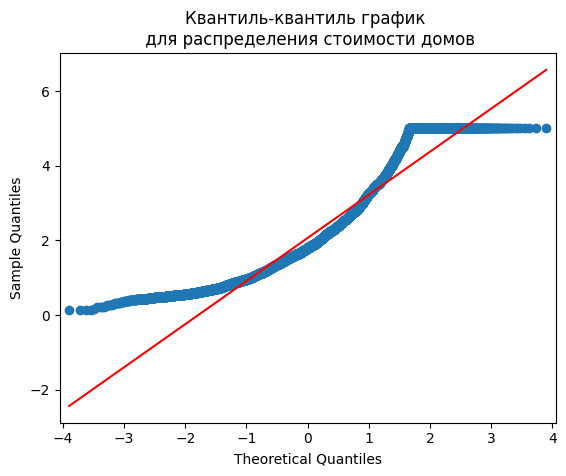

In [11]:
import numpy as np
import statsmodels.api as sm
from sklearn import datasets
from matplotlib import pyplot as plt

# загружаем данные
dataset = datasets.fetch_california_housing()
data = dataset.target

# задаём параметры квантиль-квантиль графика
sm.qqplot(data, line='s')
plt.title('Квантиль-квантиль график \n для распределения стоимости домов')

# отображаем квантиль-квантиль график
plt.show()

Точки не располагаются на диагонали - распределение стоимости домов *не является нормальным* (как мы видели и по гистограмме).

Графические методы могут быть неудобны в граничных случаях, когда сложно визуально определить, нормально ли распределение. *Например*, распределение может быть симметричным и похожим на колокол, но не соответствовать другим признакам нормального распределения. Также *гистограмма* и *Q-Q Plot неинформативны на маленьких выборках.

В таких случаях на помощь приходят специальные статистические тесты.

**СТАТИСТИЧЕСКИЕ МЕТОДЫ ПРОВЕРКИ НА НОРМАЛЬНОСТЬ**

Существует несколько статистических методов, которые позволяют получить количественную оценку для проверки на нормальность. Мы рассмотрим наиболее часто встречающийся метод - **тест Шапиро - Уилка.**

**Тест Шапиро - Уилка** оценивает выборку данных и определяет, насколько вероятно, что данные были получены из нормального распределения.

*Тест хорошо работает на выборках до 5000 объектов.*

**Гипотезы в основе теста:**

* **Нулевая:** *данные распределены нормально*.
* **Альтернативная:** *данные не распределены нормально*.

Если *p-value* теста больше уровня значимости **α,** то мы считаем, что данные распределены *нормально*.

**ПРИМЕР ИСПОЛЬЗОВАНИЯ ТЕСТА НА PYTHON**

В *Python* **тест Шапиро - Уилка** реализован в функции **shapiro()** пакета *scipy*. Эта функция принимает на вход выборочные данные, а выдаёт *p-*значение и дополнительный параметр - статистику теста.

**Примечание.** Статистика теста не будет нас интересовать, так как её интерпретация, в отличие от *p-value*, зависит от конкретного типа теста. Поэтому для проведения статистических тестов здесь и далее мы будем ориентироваться только на значение *p-value*.

Рассмотрим пример использования этой функции.

Допустим, нам необходимо проверить, нормально ли распределение количества заказов в день в некотором интернет-магазине. Чтобы правильно выбрать тест, количество заказов нужно проверить на нормальность:

In [12]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [31, 38, 30, 58, 40, 36, 38, 44, 43, 39, 36, 41, 37, 20, 38, 35, 38, 11, 42, 34]

# проводим тест Шапиро — Уилка
_, p = stats.shapiro(data)

print('p-value = %.3f' % (p))

# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

# p-value = 0.015
# Распределение не нормальное

p-value = 0.015
Распределение не нормальное


Мы рассмотрели **графические** и **статистические методы** проверки **на нормальность.** *Их можно использовать как вместе, так и по отдельности.*

**Тест Шапиро - Уилка -** не единственный метод проверки на нормальность. Существуют и другие, например, **тест Д’Агостино** или **тест Колмогорова - Смирнова.** У всех этих методов разные принципы работы, но очень похожие результаты, поэтому в большинстве случаев можно использовать любой из них. Ещё больше способов проверки на нормальность.

Ранее мы говорили, что для нормально распределённых данных можно использовать **параметрические тесты.** Теперь мы умеем проверять, является ли распределение нормальным, а значит, настало время обсудить параметрические тесты. Но прежде закрепим полученные знания небольшим тестом.

**Задание 15.** 

Зачем при проведении статистических тестов проверять данные на нормальность ?
* *Чтобы получить возможность воспользоваться параметрическими тестами* (Мы проверяем данные на нормальность, чтобы иметь возможность воспользоваться параметрическими тестами, которые являются более мощными по сравнению с непараметрическими аналогами).

**Задание 16.**

Было измерено время, которое необходимо, чтобы оформить заказ в онлайн-магазине. В результате получены следующие значения:

<img src="images/Задание 16.png">

#### **VII. Параметрические тесты**

В предыдущем юните мы рассмотрели методы проверки на нормальность. Она необходима, чтобы выбрать, какие статистические тесты использовать:

* **параметрические,** *если распределение признака нормальное*;
* или **непараметрические,** *если распределение признака отлично от нормального или о нём нет информации*.

В этом юните мы:

* разберём параметрические тесты, которые упомянули в алгоритме выбора статистического теста для количественных признаков;
* для каждого теста приведём описание функции, которая реализует его в *Python*-библиотеках, и пример использования на *Python*.

**Примечание.** При проведении тестов в этом модуле мы не будем вдаваться в детали расчётов - все они реализованы в библиотеках *Python* и не выполняются вручную. Задача специалиста по *Data Science* - понимать область применения каждого из тестов и уметь интерпретировать их результаты.

*Все функции, которые реализуют параметрические тесты в библиотеках Python:*

* **на вход принимают:**
    * *выборки или их параметры*;
    * *параметры проверяемой гипотезы*;
* **на выход отдают:**
    * *уровень значимости p (p-value)*;
    * *дополнительные параметры (в большинстве случаев они нам не нужны)*.

Предполагается, что в примерах из этого юнита все данные распределены нормально. Мы не будем проверять нормальность распределения до проведения теста в целях экономии времени и количества кода. Однако в реальных задачах, чтобы сделать выбор теста, требуется сделать проверку на нормальность.

**I. ОДНОВЫБОРОЧНЫЙ T-КРИТЕРИЙ**

**Одновыборочный t-критерий (t-test)** используют, чтобы сравнить среднее значение признака с его заданным значением.

*Одновыборочный t-критерий* реализован в функции **ttest_1samp()** в модуле *stats* библиотеки *scipy*.

**Основные входные параметры:**

* **a -** *выборочные данные*;
* **popmean -** *ожидаемое среднее значение признака*;
* **alternative -** *вид альтернативной гипотезы*:
    * **"two-sided"** *(двусторонняя, используется по умолчанию)*;
    * **"less"** *(левосторонняя)*;
    * **"greater"** *(правосторонняя)*.

**Примеры задач, когда может понадобиться использование теста:**

* Необходимо проверить, что среднее время, которое пользователи проводят на сайте, больше 5 минут.
* Необходимо установить, соответствуют ли химические показатели товара заявленным на упаковке.

**ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON**

**БИЗНЕС-ЗАДАЧА**

Компания закупает батареи для своих устройств у определённого производителя. Раньше батареи работали *40 часов*. Производитель утверждает, что батареи были улучшены и теперь работают дольше.

Компания хочет проверить, правда ли, что батареи работают *больше 40 часов*. Для этого случайным образом выбрали *20 батарей*, замерили время их работы и получили следующие данные в часах: **41, 38, 40, 46, 40, 46, 41, 44, 43, 39, 36, 41, 37, 45, 38, 45, 38, 48, 42, 34.**

Уровень значимости необходимо взять равным **0.05.**

**РЕШЕНИЕ:**

Сформулируем гипотезы в математическом виде:

* **Нулевая гипотеза:** среднее время работы батареи **(μ)** меньше или равно *40 часам*: **H₀: μ ≤ 40.**
* **Альтернативная гипотеза:** среднее время работы батареи **(μ)** больше чем *40 часов*: **H₁: μ₁ > 40.**

**Решение на Python:**

In [13]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [41, 38, 40, 46, 40, 46, 41, 44, 43, 39, 36, 41, 37, 45, 38, 45, 38, 48, 42, 34]

# проводим тест
_, p = stats.ttest_1samp(data, popmean=40, alternative='greater')

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.103
# p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.

p-value = 0.103
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод:** *У нас нет оснований утверждать, что время работы батарей стало больше, чем 40 часов*.

**II. ДВУХВЫБОРОЧНЫЙ T-КРИТЕРИЙ**

**Двухвыборочный t-критерий (t-test)** используют, чтобы сравнить средние значения в двух независимых группах.

**Двухвыборочный t-критерий** реализован в функции **ttest_ind()** в модуле *stats* библиотеки *scipy*.

**Основные входные параметры:**

* **a, b -** *выборочные данные двух групп*;
* **alternative -** *вид альтернативной гипотезы*:
    * **"two-sided"** *(двусторонняя, используется по умолчанию)*;
    * **"less"** *(левосторонняя)*;
    * **"greater"** *(правосторонняя)*;
* **equal_var -** *равны ли дисперсии в группах (по умолчанию равны)*.

**Ограничения применения теста:**

* Группы должны быть независимыми.

* Перед использованием необходимо установить равенство (или неравенство) дисперсий в выборках. От этого зависит значение параметра **equal_var.**

Проверить равенство дисперсии в группах можно с помощью *тестов Левена или Бартлетта*, которые реализованы в функциях **levene()** и **bartlett()** модуля *stats* библиотеки *scipy*:

* Нулевая гипотеза обоих тестов утверждает, что дисперсии групп равны.
* На вход функции получают выборочные данные.
* На выход функции отдают p-значение.
* Тест можно применять, только если данные в обеих выборках распределены нормально.

Проверку на нормальность нужно выполнить отдельно для каждой из двух групп. Если хотя бы в одной группе распределение отличается от нормального, необходимо обратиться к непараметрическим тестам.

**Примеры задач, когда может понадобиться использование теста (при соблюдении всех его ограничений):**

* Перед испытанием нового фитнес-тренажёра проверяют, что рост и вес в двух группах людей одинаков.
* Есть две выборки студентов из двух университетов. Необходимо узнать, есть ли статистически значимая разница в среднем количестве часов в неделю, которые студенты этих университетов тратят на учёбу.

**ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON**

**БИЗНЕС-ЗАДАЧА**

Компания закупает для своих устройств батареи у производителя «Заряд». Производитель «Планета» предлагает перейти на их батареи, утверждая, что они работают дольше. Компания хочет проверить, правда ли, что батареи «Планета» работают дольше, чем батареи «Заряд».

Для этого случайным образом выбрали по *20 батарей* «Заряд» и «Планета», замерили время их работы и получили следующие данные в часах:

**Батареи «Заряд»:** 41, 38, 40, 46, 40, 46, 41, 44, 43, 39, 36, 41, 37, 45, 38, 45, 38, 48, 42, 34.

**Батареи «Планета»:** 40, 39, 42, 46, 41, 46, 42, 45, 44, 42, 38, 42, 38, 46, 39, 46, 40, 41, 43, 36.

Уровень значимости необходимо взять равным **0.05.**

**РЕШЕНИЕ:**

Сформулируем гипотезы в математическом виде:

* **Нулевая гипотеза:** среднее время работы батарей «Планета» **(μ1)** меньше или равно среднему времени работы батарей «Заряд» **(μ2):** **H0: μ1 ≤ μ2**
* **Альтернативная гипотеза:** среднее время работы батарей «Планета» **(μ1)** больше среднего времени работы батарей «Заряд» **(μ2):** **H1: μ1 > μ2**

**Решение на Python:**

In [14]:
import scipy.stats as stats
import numpy as np

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_zaryad = np.array([41,38,40,46,40,46,41,44,43,39,36,41,37,45,38,45,38,48,42,34])
data_planeta = np.array([40,39,42,46,41,46,42,45,44,42,38,42,38,46,39,46,40,41,43,36])

# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(data_planeta, data_zaryad)
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.')
else:
    print('Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.')

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.ttest_ind(data_planeta, data_zaryad, alternative='greater', equal_var=True)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# Тест на равенство дисперсий
# p-value = 0.340
# Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.

# Тест на равенство средних
# p-value = 0.260
# p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.

Тест на равенство дисперсий
p-value = 0.340
Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.

Тест на равенство средних
p-value = 0.260
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод:** *У нас нет оснований утверждать, что батареи «Планета» работают дольше, чем батареи «Заряд»*.

Обратим внимание, что порядок выборок в параметрах **stats.ttest_ind** важен: он должен соответствовать альтернативной гипотезе.

Если бы в нашем примере мы перевернули альтернативную гипотезу,

**Альтернативная гипотеза: среднее время работы батарей «Заряд» **(μ2)** меньше среднего времени работы батарей «Планета» (μ1): H1: μ2 < μ1, то параметры теста были бы такими (изменён порядок выборок и указано, что альтернативная гипотеза - "less"):**

**_, p = stats.ttest_ind(data_zaryad, data_planeta, alternative='less', equal_var=True)**

При этом значение *p-value* не изменяется. Вывод получается таким же.

**III. ОДНОФАКТОРНЫЙ ДИСПЕРСИОННЫЙ АНАЛИЗ (ANOVA)**

**Однофакторный дисперсионный анализ (ANOVA)** используют, чтобы сравнить средние значения в более чем двух независимых группах.

**Тест ANOVA** реализован в функции **f_oneway()** в модуле *stats* библиотеки *scipy*.

**Основные входные параметры:**

* **sample1, sample2, … -** выборочные данные групп.

**Ограничения применения теста:**

* Группы должны быть независимыми.
* Тест можно выполнять на группах с равной дисперсией.

Проверку равенства дисперсий также можно выполнить с помощью *тестов Левена* или *Бартлетта*. Если дисперсии не равны, необходимо обратиться к непараметрическим тестам.

* Тест можно применять, только если данные в обеих выборках распределены нормально.

Проверку на нормальность нужно выполнить отдельно для каждой из двух групп. Если хотя бы в одной группе распределение отличается от нормального, необходимо обратиться к непараметрическим тестам.

**Примеры задач, когда может понадобиться использование теста (при соблюдении всех его ограничений):**

* Проводится эксперимент, в котором изучают влияние различных видов удобрений на урожайность растений. В эксперименте участвуют несколько выборок растений, к которым применяют разные виды удобрений (более двух).
* Проводится исследование, в котором изучают влияние различных диет на уровень холестерина у людей. В исследовании участвуют три группы людей, каждая из которых придерживается определённой диеты.

**ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON**

**БИЗНЕС-ЗАДАЧА**

Компания закупает для своих устройств батареи у производителя «Заряд». Производители «Планета» и «Энергия» предлагают перейти на их батареи, утверждая, что они работают дольше. Компания хочет проверить, правда ли, что между батареями трёх производителей есть разница во времени работы.

Уровень значимости необходимо взять равным **0.05.**

Случайным образом выбрали по *20 батарей* «Заряд», «Планета» и «Энергия», замерили время их работы и получили следующие данные в часах:

* **Батареи «Заряд»:** 31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34.
* **Батареи «Планета»:** 36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52, 42, 44, 43, 35, 43.
* **Батареи «Энергия»:** 35, 37, 39, 49, 45, 26, 46, 32, 49, 41, 48, 41, 47, 37, 45, 41, 43, 38, 40, 43.

**РЕШЕНИЕ:**

Сформулируем гипотезы в математическом виде:

* **Нулевая гипотеза:** среднее время работы батарей «Заряд» **(μ1),** «Планета» **(μ2)** и «Энергия» **(μ3)** *одинаковое*: **H0: μ1 = μ2 = μ3**

* **Альтернативная гипотеза:** среднее время работы батарей «Заряд» **(μ1),** «Планета» **(μ2)** и «Энергия» **(μ3)** *не одинаковое*: **H0: μ1 ≠ μ2 ≠ μ3**

**Решение на Python:**

In [15]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05

# загружаем данные
group_zaryad = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]
group_planeta = [36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52, 42, 44, 43, 35, 43]
group_energiya = [35, 37, 39, 49, 45, 26, 46, 32, 49, 41, 48, 41, 47, 37, 45, 41, 43, 38, 40, 43]

# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(group_zaryad, group_planeta, group_energiya)
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, нужно использовать непараметрический тест')
else:
    print('Дисперсии одинаковы, мы можем использовать тест ANOVA')

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.f_oneway(group_zaryad, group_planeta, group_energiya)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# Тест на равенство дисперсий
# p-value = 0.303
# Дисперсии одинаковы, мы можем использовать тест ANOVA

# Тест на равенство средних
# p-value = 0.141
# p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.

Тест на равенство дисперсий
p-value = 0.303
Дисперсии одинаковы, мы можем использовать тест ANOVA

Тест на равенство средних
p-value = 0.141
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод:** *У нас нет оснований утверждать, что у батарей трёх производителей есть разница во времени работы*.

**IV. ПАРНЫЙ T-КРИТЕРИЙ**

**Парный t-критерий (t-test)** используют, чтобы сравнить средние значения в двух зависимых группах.

**Парный t-критерий** реализован в функции **ttest_rel()** в модуле *stats* библиотеки *scipy*.

**Основные входные параметры:**

* **a, b -** *выборочные данные двух зависимых групп*;
* **alternative -** *вид альтернативной гипотезы*:
    * **"two-sided"** *(двусторонняя, используется по умолчанию)*;
    * **"less"** *(левосторонняя)*;
    * **"greater"** *(правосторонняя)*.

**Ограничения применения теста:**

* Тест можно применять, только если данные в обеих выборках распределены нормально.

Проверку на нормальность нужно выполнить отдельно для каждой из двух групп. Если хотя бы в одной группе распределение отличается от нормального, необходимо обратиться к непараметрическим тестам.

**Примеры задач, когда может понадобиться использование теста:**

* Требуется оценить эффективность нового лекарства, сравнивая показатели здоровья (пульса/давления/уровня сахара в крови) одних и тех же пациентов до и после его применения.
* Требуется оценить эффективность рекламной кампании, сравнивая показатели продаж до и после её запуска.

**ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON**

**БИЗНЕС-ЗАДАЧА**

Компания закупает для своих устройств батареи у производителя «Заряд». Производитель «Планета» предлагает перейти на их батареи, утверждая, что они работают дольше. Компания хочет проверить, правда ли, что батареи «Планета» работают дольше, чем батареи «Заряд».

Уровень значимости необходимо взять равным **0.05.**

При планировании эксперимента присутствовал эксперт, который сказал, что время работы батареи зависит от устройства, на котором проходит замер, то есть результаты эксперимента оказались зависимыми.

Случайным образом выбрали по *20 батарей* «Заряд» и «Планета». На каждом из устройств сначала замерили время работы батареи одного производителя, затем - второго и получили следующие данные в часах:

* **Батареи «Заряд»:** 1, 34, 35, 47, 39, 42, 36, 43, 48, 38, 36, 47, 39, 32, 45, 40, 36, 39, 42, 46.
* **Батареи «Планета»:** 45, 42, 40, 43, 44, 41, 43, 39, 45, 45, 40, 43, 41, 42, 41, 41, 43, 46, 45, 42.

**РЕШЕНИЕ:**

Сформулируем гипотезы в математическом виде:

* **Нулевая гипотеза:** среднее время работы батарей «Планета» **(μ1)** меньше или равно среднему времени работы батарей «Заряд» **(μ2):** **H0: μ1 ≤ μ2**

* **Альтернативная гипотеза:** среднее время работы батарей «Планета» **(μ1)** больше среднего времени работы батарей «Заряд» **(μ1):** **H1: μ1 > μ2**

**Решение на Python:**

In [16]:
import scipy.stats as stats
import numpy as np

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_zaryad = np.array([41, 34, 35, 47, 39, 42, 36, 43, 48, 38, 36, 47, 39, 32, 45, 40, 36, 39, 42, 46])
data_planeta = np.array([45, 42, 40, 43, 44, 41, 43, 39, 45, 45, 40, 43, 41, 42, 41, 41, 43, 46, 45, 42])

# проводим тест
_, p = stats.ttest_rel(data_planeta, data_zaryad, alternative='greater')
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
# p-value = 0.023
# p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.

p-value = 0.023
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


**Вывод:** *батареи «Планета» работают дольше, чем батареи «Заряд»*.

**V. ОДНОФАКТОРНЫЙ ДИСПЕРСИОННЫЙ АНАЛИЗ (ANOVA) С ПОВТОРНЫМИ ИЗМЕРЕНИЯМИ**

**Однофакторный дисперсионный анализ (ANOVA)** с повторными измерениями используют, чтобы сравнить средние значения в более чем двух зависимых группах.

**Тест ANOVA** с повторными измерениями реализован в функции **AnovaRM()** в модуле *stats* библиотеки *statsmodels*.

**Основные входные параметры:**

* **data -** *датафрейм с выборочными данными (три колонками: id группы, id объекта, значение признака)*;
* **within -** *название колонки с id группы*;
* **subject -** *название колонки с id объекта*;
* **depvar -** *название колонки со значением признака*.

**Ограничения применения теста:**

* Тест можно применять, только если данные в обеих выборках распределены нормально.

Проверку на нормальность нужно выполнить отдельно для каждой из двух групп. Если хотя бы в одной группе распределение отличается от нормального, необходимо обратиться к непараметрическим тестам.

**Примеры задач, когда может понадобиться использование теста:**

* Требуется оценить эффективность нового лекарства, сравнивания показатели здоровья одних и тех же пациентов до его приёма и через каждую неделю после начала приёма (количество периодов - более двух).
* Требуется изучать влияние нового рекламного материала на покупательское поведение клиентов ежедневно на протяжении недели.

**ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON**

**БИЗНЕС-ЗАДАЧА**

Компания закупает для своих устройств батареи у производителя «Заряд». Производители «Планета» и «Энергия» предлагают перейти на их батареи, утверждая, что они работают дольше. Компания хочет проверить, правда ли, что между батареями трёх производителей есть разница во времени работы.

Уровень значимости необходимо взять равным **0.05.**

При планировании эксперимента присутствовал эксперт, который сказал, что время работы батареи зависит от устройства, на котором проходит замер.

Случайным образом выбрали по пять батарей «Заряд», «Планета» и «Энергия». На каждом из устройств замерили время работы батареи одного производителя, затем - второго, затем - третьего и получили следующие данные в часах:

* **Батареи «Заряд»:** 36, 45, 41, 41, 35.
* **Батареи «Планета»:** 32, 34, 42, 48, 43.
* **Батареи «Энергия»:** 41, 39, 35, 34, 52.

**РЕШЕНИЕ:**

Сформулируем гипотезы в математическом виде:

* **Нулевая гипотеза:** среднее время работы батарей «Заряд» **(μ1),** «Планета» **(μ2)** и «Энергия» **(μ3)** *одинаковое*: **H0: μ1 = μ2 = μ3**

* **Альтернативная гипотеза:** среднее время работы батарей «Заряд» **(μ1),** «Планета» **(μ2)** и «Энергия» **(μ3)** *не одинаковое*: **H0: μ1 ≠ μ2 ≠ μ3**

**Решение на Python:**

In [17]:
import numpy as np
import pandas as pd
from statsmodels.stats.anova import AnovaRM

# задаём уровень значимости
alpha = 0.05 

# создаём датасет
data = pd.DataFrame({'group': np.repeat(['Заряд', 'Планета', 'Энергия'], 5),
                          'object_id': np.tile([1, 2, 3, 4, 5], 3),                          
                          'value': [36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52]})


# проводим тест
print(AnovaRM(data=data, depvar='value', subject='object_id', within=['group']).fit())

#              Anova
# ==================================
#       F Value Num DF Den DF Pr > F
# ----------------------------------
# group  0.0100 2.0000 8.0000 0.9900
# ==================================

              Anova
      F Value Num DF Den DF Pr > F
----------------------------------
group  0.0100 2.0000 8.0000 0.9900



Обратим внимание, что для использования теста необходимо вызвать метод **fit().** Формат информации, который возвращает функция **AnovaRM(),** сильно отличается от ранее рассмотренных тестов: *p-value* отображается в колонке **Pr > F.**

В нашем примере p-значение равно **0.99.** P-значение больше, чем заданный уровень значимости **0.05.** Таким образом, у нас нет оснований отвергнуть нулевую гипотезу.

**Вывод:** *У нас нет оснований утверждать, что у батарей трёх производителей есть разница во времени работы*.

Добавим все рассмотренные функции в наш алгоритм выбора теста (сохраните схему на свой компьютер, чтобы рассмотреть её детально):

<img src="images/Алгоритм выбора теста.png">

*Итак*, мы изучили наиболее популярные параметрические тесты и рассмотрели пример на *Python* для каждого из них. Далее нам предстоит разобраться с непараметрическими тестами.

**Задание 17.**

Как называется функция, с помощью которой в *Python* реализован однофакторный дисперсионный анализ *(ANOVA)* ?

* *scipy.stats.f_oneway()*

**Задание 18.**

Какое значение должно быть у параметра *alternative* функции **scipy.stats.ttest_1samp,** чтобы можно было проверить нулевую гипотезу «Средний чек в магазине равен 1000 рублей» ?

* *alternative = "two-sided"’"*

**Задание 19.**

Компания оптимизировала доставку товаров и хочет узнать, стало ли среднее время доставки меньше *40 минут*. Измерили время *20* случайных доставок - оно приведено в минутах и содержится в списке *data*:

data = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]

Данные распределены нормально.

**1.** Выберем статистический тест, который нужен для ответа на вопрос компании:

* *Одновыборочный t-критерий* (Время доставки - количественный признак, группа одна, признак распределён по нормальному закону. Следовательно, подходит одновыборочный t-критерий.)

**2.** Проведем статистический тест для ответа на вопрос компании.

В качестве ответа введите полученное *p-value*, округлённое до трёх знаков после точки-разделителя.

*Ответ:* **0.018**

**3.** Какой вывод можно сделать по результатам теста ?

* *P-значение меньше, чем заданный уровень значимости **0.05.** Отвергаем нулевую гипотезу. Время доставки стало меньше 40 минут.* (P-значение = 0.018. Это меньше, чем 0.05. Поэтому мы отвергаем нулевую гипотезу в пользу альтернативной: «Время доставки стало меньше 40 минут»).

**Задание 20.**

Компания хочет узнать, отличается ли время доставки в трёх районах города: Северном, Южном, Восточном. Измерили время *25* случайных доставок в каждом из районов - оно составило в минутах:

* **Северный:**

data_north = [117, 107, 29, 121, 86, 35, 117, 136, 89, 102, 131, 114, 118, 145, 67, 16, 102, 52, 144, 35, 72, 36, 103, 63, 73]

* **Южный:**

data_south = [56, 74, 94, 29, 76, 76, 61, 76, 65, 69, 78, 17, 65, 21, 35, 87, 53, 32, 18, 74, 28, 23, 67, 16, 98]

* **Восточный:**

data_east = [141, 109, 120, 93, 57, 96, 84, 127, 130, 85, 99, 53, 51, 55, 103, 53, 103, 142, 112, 67, 139, 93, 83, 123, 111]
Считаем, что данные распределены нормально.

**1.** Выберем статистический тест, который нужен для ответа на вопрос компании:

* *ANOVA* (Время доставки - количественный признак, групп три, группы независимы, признак распределён по нормальному закону. Дисперсии равны. Следовательно, подходит тест ANOVA.)

**2.** Проведем статистический тест для ответа на вопрос компании.

В качестве ответа введите полученное *p-value*, округлённое до трёх знаков после точки-разделителя.

*Ответ:* **0.000**

**3.** Какой вывод можно сделать по результатам проведения теста ?

* *P-значение меньше, чем заданный уровень значимости **0.05.** Отвергаем нулевую гипотезу. Время доставки в разные районы разное.*

**Задание 21.**

Компания провела обучение курьеров и хочет узнать, привело ли это к уменьшению времени доставки. Для *30* курьеров было измерено время доставки до и после обучения и получены следующие данные в минутах:

* **до:**

data_before = [21, 19, 25, 18, 32, 10, 26, 25, 35, 26, 23, 37, 30, 40, 29, 35, 28, 39, 26, 32, 40, 29, 44, 34, 37, 12, 37, 23, 33, 42]

* **после:**

data_after = [23, 17, 41, 25, 9, 22, 18, 42, 27, 29, 30, 23, 38, 14, 27, 29, 28, 18, 19, 26, 29, 25, 32, 26, 47, 50, 30, 30, 36, 16]

**1.** Выберем статистический тест, который нужен для ответа на вопрос компании:

* *Парный t-критерий* (Время доставки - количественный признак, групп две, группы зависимы, признак распределён по нормальному закону. Следовательно, подходит парный t-критерий).

**2.** Проведем статистический тест для ответа на вопрос компании.

В качестве ответа введите полученное p-value, округлённое до трёх знаков после точки-разделителя.

*Ответ:* **0.213**
 
**3.** Какой вывод можно сделать по результатам проведения теста ?

* *P-значение больше, чем заданный уровень значимости **0.05.** Нет оснований отвергать нулевую гипотезу. Нет оснований утверждать, что обучение курьеров привело к уменьшению времени доставки* (P-значение = 0.213. Это больше, чем 0.05. Нет оснований отвергать нулевую гипотезу и утверждать, что обучение курьеров привело к уменьшению времени доставки).

#### **VIII. Непараметрические тесты**

В предыдущем юните мы рассмотрели параметрические методы для нормально распределённых данных, а в этом поговорим о непараметрических. Такие тесты используются, когда данные не распределены нормально или об их распределении ничего не известно.

Особенность непараметрических методов в том, что они *сравнивают не сами значения признаков, а их ранги или частоты*.

В параметрических методах нулевые гипотезы содержали утверждения о равенстве средних значений признаков в группах. В непараметрических тестах нулевые гипотезы будут о равенстве распределений признаков (что включает в себя равенство средних) или о равенстве медиан признаков (в нормальных распределениях медианы и средние равны).

**Все функции, которые реализуют непараметрические тесты в Python-библиотеках:**

* **берут на вход:**
    * *выборки или их параметры*;
    * *параметры проверяемой гипотезы*.

* **отдают на выход:**
    *уровень значимости p (p-value)*;
    *дополнительные параметры*.

В примерах этого юнита мы не проверяем данные на нормальность. Однако чтобы выбрать тест в реальных задачах, необходимо сделать такую проверку. Если данные распределены нормально, лучше выбрать параметрические тесты.

**ГИПОТЕЗЫ ДЛЯ ОДНОВЫБОРОЧНЫХ ТЕСТОВ**

Как сформулировать нулевую и альтернативную гипотезы для теста, если у нас всего одна выборка ?

В этом случае имеющаяся выборка (точнее, её статистика, вычисляемая тестом) будет сравниваться со значением, заданным в параметрах теста:

* **Нулевая гипотеза -** соответствие (равенство) выборки и заданного значения.
* **Альтернативная гипотеза -** их отличие.

**1. КРИТЕРИЙ ЗНАКОВ (ДЛЯ ОДНОЙ ГРУППЫ)**

**Критерий знаков (для одной группы)** используют, чтобы сравнить значения медианы признака с заданным значением. Это непараметрический аналог **одновыборочного t-критерия.**

Критерий знаков (для одной группы) реализован в функции **sign_test** модуля *stats* библиотеки *statsmodels*.

**Основные входные параметры:**

* **samp -** *выборочные данные*;
* **mu0 -** *ожидаемое значение медианы признака*.

**Пример задачи, когда может понадобиться использование теста:**

* Требуется проверить, соответствует ли время ответа оператора времени, заявленному в программе лояльности (время ответа, как правило, не подчиняется нормальному закону).

**ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON**

**БИЗНЕС-ЗАДАЧА**

Чтобы отвечать на наиболее часто встречающиеся вопросы о заказах, онлайн-магазин добавил на сайт чат-бота. Планировалось, что это приведёт к изменению времени, за которое покупатель получает ответ на вопрос (раньше оно составляло 60 секунд). Бизнес-заказчик просит узнать, действительно ли время получения ответа больше не составляет 60 секунд.

Чтобы это проверить, замерили время ответа чат-бота для 30 случайно выбранных вопросов. В результате получили следующие данные (в секундах):

55, 53, 60, 49, 45, 57, 46, 53, 59, 53, 53, 55, 42, 41, 59, 43, 47, 60, 50, 57, 59, 56, 52, 48, 59, 53, 59, 50, 59, 59

Уровень значимости необходимо взять равным **0.05.**

**РЕШЕНИЕ:**

Сформулируем гипотезы в математическом виде:

* **Нулевая гипотеза:** значение медианы получения ответа с помощью чат-бота **(m)** равно *60* секун: **H0 : m = 60.**

* **Альтернативная гипотеза:** значение медианы получения ответа с помощью чат-бота **(m)** не равно *60* секунд: **H1 : m! = 60.**

**Решение на Python:**

In [21]:
from statsmodels.stats.descriptivestats import sign_test

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [55, 53, 60, 49, 45, 57, 46, 53, 59, 53, 53, 55, 42, 41, 59, 43, 47, 60, 50, 57, 59, 56, 52, 48, 59, 53, 59, 50, 59, 59]

# проводим тест
_, p = sign_test(data, 60)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.000
# p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


**Вывод:** *Время получения ответа изменилось и больше не составляет 60 секунд.*

**2. U-КРИТЕРИЙ МАННА - УИТНИ**

**U-критерий Манна - Уитни** используют, чтобы оценить различия распределений признака в двух независимых группах. Это непараметрический аналог **двухвыборочного t-критерия.**

**U-критерий Манна - Уитни** реализован в функции **mannwhitneyu** модуля *stats* библиотеки *scipy*.

**Основные входные параметры:**

* **x, y -** *выборочные данные двух групп*;
* **alternative -** *вид альтернативной гипотезы*:
    * **"two-sided"** *(двусторонняя, используется по умолчанию)*;
    * **"less"** *(левосторонняя)*;
    * **"greater"** *(правосторонняя)*.

**Метод основан на следующей процедуре:**

**1.** Две выборки объединяют и упорядочивают в порядке возрастания признака.
**2.** Определяют, равномерно ли распределены объекты каждой группы в упорядоченном списке.
    **а.** Если объекты одной из групп сконцентрированы в одной из частей списка, то распределения признаков неодинаковы.

**Примеры задач, когда может понадобиться использование теста:**

* Требуется сравнить распределение зарплат выпускников университета **А** с зарплатой пяти выпускников университета **Б** (распределение зарплаты, как правило, не является нормальным).
* Необходимо узнать, различаются ли распределения потери веса для двух групп: для людей, использующих диету **А,** и для людей, использующих диету **Б** (потеря веса, как правило, не распределяется нормально).

**ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON**

**БИЗНЕС-ЗАДАЧА**

Чтобы отвечать на наиболее часто встречающиеся вопросы о заказах, онлайн-магазин добавил на сайт чат-бота. До этого покупатели могли получить ответ на вопрос через звонок оператору. Бизнес-заказчик просит проверить, изменилось ли время получения ответа после внедрения чат-бота.

Чтобы это выяснить, замерили время ответа с помощью чат-бота для 30 случайно выбранных вопросов, а также время ответа через звонок оператору для ещё 30 случайно выбранных вопросов . В результате получили следующие данные (в секундах):

* **Чат-бот:** 55, 53, 60, 49, 45, 57, 46, 53, 59, 53, 53, 55, 42, 41, 59, 43, 47, 60, 50, 57, 59, 56, 52, 48, 59, 53, 59, 50, 59, 59.
* **Звонок оператору:** 72, 80, 66, 72, 75, 71, 73, 71, 75, 68, 63, 68, 62, 65, 77, 66, 67, 62, 60, 74, 61, 67, 61, 63, 62, 79, 61, 63, 62, 63.

Уровень значимости необходимо взять равным **0.05.**

**РЕШЕНИЕ:**

Сформулируем гипотезы:

* **Нулевая гипотеза:** распределения времени получения ответа через чат-бота и через звонок оператору одинаковы.
* **Альтернативная гипотеза:** распределения времени получения ответа через чат-бота и через звонок оператору неодинаковы.

**Решение на Python:**

In [22]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_chat_bot = [55, 53, 60, 49, 45, 57, 46, 53, 59, 53, 53, 55, 42, 41, 59, 43, 47, 60, 50, 57, 59, 56, 52, 48, 59, 53, 59, 50, 59, 59]
data_operator = [72, 80, 66, 72, 75, 71, 73, 71, 75, 68, 63, 68, 62, 65, 77, 66, 67, 62, 60, 74, 61, 67, 61, 63, 62, 79, 61, 63, 62, 63]

# проводим тест
_, p = stats.mannwhitneyu(data_chat_bot, data_operator)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.000
# p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


**Вывод:** *Время получения ответа изменилось после внедрения чат-бота.*

**3. КРИТЕРИЙ УИЛКОКСОНА**

**Критерий Уилкоксона** используют, чтобы оценить различия распределений признака в двух зависимых группах. Это непараметрический аналог **парного t-критерия.**

**Критерий Уилкоксона** реализован в функции **wilcoxon** модуля *stats* библиотеки *scipy*.

**Основные входные параметры:**

* **x, y -** *выборочные данные двух групп*;
* **alternative -** *вид альтернативной гипотезы*:
    * **"two-sided"** *(двусторонняя, используется по умолчанию)*;
    * **"less"** *(левосторонняя)*;
    * **"greater"** *(правосторонняя)*.

Этот тест аналогичен критерию знаков (для одной группы).

**Примеры задач, когда может понадобиться использование теста:**

* Необходимо сравнить два метода обучения, сравнив успеваемость студентов до и после использования каждого из методов (успеваемость не распределена нормально).
* Требуется оценить различия в затратах на производство продукта до и после обновления технологий (затраты не подчиняются нормальному закону).

**ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON**

**БИЗНЕС-ЗАДАЧА**

Чтобы отвечать на наиболее часто встречающиеся вопросы о заказах, онлайн-магазин добавил на сайт чат-бота. До этого покупатели могли получить ответ на вопрос через звонок оператору. Планировалось, что нововведение приведёт к уменьшению времени получения ответа. Бизнес-заказчик просит узнать, действительно ли получить ответ с помощью чат-бота быстрее, чем через звонок оператору. Эксперты в предметной области говорят, что время ответа сильно зависит от вопроса покупателя, поэтому замер необходимо делать на одних и тех же вопросах.

Чтобы решить задачу, для 30 случайно выбранных вопросов сначала замерили время ответа с помощью чат-бота, а затем — время ответа через звонок оператору. В результате получили следующие данные (в секундах):

* **Чат-бот:** 71, 97, 71, 97, 83, 90, 83, 94, 88, 76, 79, 99, 82, 85, 93, 78, 76, 87, 73, 72, 89, 89, 71, 86, 78, 93, 86, 95, 83, 73.
* **Звонок оператору:** 114, 112, 115, 124, 101, 108, 104, 109, 103, 115, 100, 129, 120, 129, 117, 125, 112, 105, 128, 107, 120, 108, 129, 100, 116, 105, 128, 128, 120, 106.

Уровень значимости необходимо взять равным **0.05.**

**РЕШЕНИЕ:**

Сформулируем гипотезы в математическом виде:

* **Нулевая гипотеза:** распределения времени получения ответа через чат-бота и через звонок оператору одинаковы.
* **Альтернативная гипотеза:** распределение времени получения ответа через чат-бота меньше, чем распределение времени через звонок оператору.

**Решение на Python:**

In [23]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_chat_bot = [71, 97, 71, 97, 83, 90, 83, 94, 88, 76, 79, 99, 82, 85, 93, 78, 76, 87, 73, 72, 89, 89, 71, 86, 78, 93, 86, 95, 83, 73]
data_operator = [114, 112, 115, 124, 101, 108, 104, 109, 103, 115, 100, 129, 120, 129, 117, 125, 112, 105, 128, 107, 120, 108, 129, 100, 116, 105, 128, 128, 120, 106]

# проводим тест
_, p = stats.wilcoxon(data_chat_bot, data_operator, alternative = 'less')

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.000
# p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


**Вывод:** *Время получения ответа через чат-бота меньше, чем через звонок оператору*.

**4. КРИТЕРИЙ КРАСКЕЛА - УОЛЛИСА**

**Критерий Краскела - Уоллиса** (однофакторный дисперсионный анализ на рангах) является обобщением U-критерия Манна - Уитни на случай нескольких групп. Его используют, чтобы оценить различия медиан признака в двух и более независимых группах. Это непараметрический аналог **ANOVA.**

**Критерий Краскела - Уоллиса** реализован в функции **kruskal** модуля *stats* библиотеки *scipy*.

**Основные входные параметры:**

* **sample1, sample2, … -** *выборочные данные групп*.

**Примеры задач, когда может понадобиться использование теста:**

* Необходимо сравнить распределения стоимости заказов в нескольких городах. Чтобы избежать влияния выбросов, вместо сравнения средних значений используют ранги.
* Требуется сравнить распределения стоимости жилья в разных районах города. Чтобы учесть различия в распределении стоимости, вместо сравнения средних значений используют ранги.

**ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON**

**БИЗНЕС-ЗАДАЧА**

У онлайн-магазина существуют три независимых уровня программы лояльности: «Базовый», «Серебряный» и «Золотой». Вопросы покупателей, на которые не может ответить чат-бот, направляются оператору. Чтобы вопросы от покупателей более высокого уровня лояльности обрабатывались быстрее, разработали систему ранжирования вопросов. Бизнес-заказчик просит проверить, действительно ли есть разница во времени обработки вопроса для покупателей разных уровней лояльности.

Чтобы это выяснить, случайным образом выбрали по *30* вопросов для каждого уровня и замерили для них время ответа с помощью чат-бота. В результате получили следующие данные (в секундах):

* **Базовый:** 106, 96, 105, 119, 91, 118, 108, 98, 103, 102, 98, 97, 104, 100, 94, 94, 98, 103, 95, 93, 118, 91, 96, 115, 119, 111, 102, 118, 91, 98.
* **Серебряный:** 96, 95, 102, 103, 96, 120, 97, 112, 108, 90, 99, 93, 91, 91, 119, 95, 110, 108, 117, 99, 100, 99, 119, 98, 101, 95, 118, 110, 114, 116.
* **Золотой:** 99, 106, 92, 97, 98, 95, 119, 120, 116, 93, 102, 109, 98, 99, 100, 113, 91, 96, 119, 96, 95, 112, 111, 110, 102, 112, 105, 93, 111, 111.

Уровень значимости необходимо взять равным **0.05.**

**РЕШЕНИЕ:**

Сформулируем гипотезы в математическом виде:

* **Нулевая гипотеза:** медианы времени обработки вопросов от покупателей уровней базовый **(m1),** серебряный **(m2)** и золотой **(m3)** равны: **H0 : m1 = m2 = m3.**

* **Альтернативная гипотеза:** медианы времени обработки вопросов от покупателей уровней базовый **(m1),** серебряный **(m2)** и золотой **(m3)** не равны: **H1 : m1 ≠ m2 ≠ m3.**

**Решение на Python:**

In [24]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_basic = [106, 96, 105, 119, 91, 118, 108, 98, 103, 102, 98, 97, 104, 100, 94, 94, 98, 103, 95, 93, 118, 91, 96, 115, 119, 111, 102, 118, 91, 98 ]
data_silver = [96, 95, 102, 103, 96, 120, 97, 112, 108, 90, 99, 93, 91, 91, 119, 95, 110, 108, 117, 99, 100, 99, 119, 98, 101, 95, 118, 110, 114, 116]
data_gold = [99, 106, 92, 97, 98, 95, 119, 120, 116, 93, 102, 109, 98, 99, 100, 113, 91, 96, 119, 96, 95, 112, 111, 110, 102, 112, 105, 93, 111, 111]

# проводим тест
_, p = stats.kruskal(data_basic, data_silver, data_gold)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.837
# p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.

p-value = 0.837
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод:** *У нас нет оснований утверждать, что есть разница во времени обработки вопросов от покупателей разных уровней лояльности.*

**5. КРИТЕРИЙ ФРИДМАНА**

**Критерий Фридмана** используют, чтобы оценить различия распределений признака в двух и более зависимых группах. Это непараметрический аналог **парного ANOVA с повторными измерениями.**

**Критерий Фридмана** реализован в функции **friedmanchisquare** модуля *stats* библиотеки *scipy*.

**Основные входные параметры:**

* **sample1, sample2, … -** *выборочные данные групп.*

**ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON**

**БИЗНЕС-ЗАДАЧА**

У онлайн-магазина существуют три связанных между собой уровня программы лояльности: «Базовый», «Серебряный» и «Золотой». Вопросы покупателей, на которые не может ответить чат-бот, направляются оператору. Чтобы вопросы от покупателей более высокого уровня лояльности обрабатывались быстрее, разработали систему ранжирования вопросов. Бизнес-заказчик просит проверить, действительно ли есть разница во времени обработки вопроса для покупателей разных уровней лояльности. Эксперты в предметной области говорят, что время ответа сильно зависит от вопроса покупателя, поэтому замер стоит делать на одних и тех же вопросах.

Чтобы решить задачу, случайным образом выбрали 30 вопросов и замерили на них время ответа с помощью чат-бота для трёх уровней лояльности. В результате получили следующие данные (в секундах):

* **«Базовый»:** 113, 115, 108, 104, 107, 96, 114, 103, 103, 120, 92, 103, 120, 100, 110, 106, 112, 99, 118, 113, 102, 94, 92, 109, 91, 113, 95, 107, 110, 103.
* **«Серебряный»:** 89, 80, 95, 77, 82, 98, 84, 83, 73, 93, 89, 78, 90, 73, 83, 73, 84, 90, 75, 75, 86, 88, 72, 72, 96, 75, 87, 99, 80, 82.
* **«Золотой»:** 62, 84, 67, 71, 64, 89, 65, 70, 86, 77, 84, 81, 89, 68, 87, 70, 70, 61, 82, 79, 60, 62, 88, 61, 76, 87, 79, 90, 77, 65.

Уровень значимости необходимо взять равным **0.05.**

**РЕШЕНИЕ:**

Сформулируем гипотезы:

* **Нулевая гипотеза:** распределения времени обработки вопросов от покупателей уровней «Базовый», «Серебряный» и «Золотой» одинаковы.
* **Альтернативная гипотеза:** распределения времени обработки вопросов от покупателей уровней «Базовый», «Серебряный» и «Золотой» неодинаковы.

**Решение на Python:**

In [25]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_basic = [113, 115, 108, 104, 107, 96, 114, 103, 103, 120, 92, 103, 120, 100, 110, 106, 112, 99, 118, 113, 102, 94, 92, 109, 91, 113, 95, 107, 110, 103]
data_silver = [89, 80, 95, 77, 82, 98, 84, 83, 73, 93, 89, 78, 90, 73, 83, 73, 84, 90, 75, 75, 86, 88, 72, 72, 96, 75, 87, 99, 80, 82]
data_gold = [62, 84, 67, 71, 64, 89, 65, 70, 86, 77, 84, 81, 89, 68, 87, 70, 70, 61, 82, 79, 60, 62, 88, 61, 76, 87, 79, 90, 77, 65]

# проводим тест
_, p = stats.friedmanchisquare(data_basic, data_silver, data_gold)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.000
# p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


**Вывод:** *Время обработки вопросов для покупателей разных уровней лояльности различно.*

Добавим все рассмотренные функции в алгоритм выбора теста (откройте изображение со схемой в новой вкладке или сохраните на свой компьютер, чтобы рассмотреть её детально):

<img src="images/Алгоритм выбора теста-2.png">

В этом юните мы рассмотрели наиболее популярные непараметрические тесты. Для каждого из них мы привели пример использования на *Python*.

Изучив параметрические и непараметрические тесты, мы научились выполнять шаг *5* алгоритма проверки статистических гипотез - проводить статистические тесты и вычислять *p-value*.

В следующем юните мы узнаем, какие статистические тесты используют для оценки категориальных признаков.

**Задание 22.**

Распределим тесты по категориям:

* **Параметрические тесты:**
    * *Парный t-критерий*
    * *ANOVA*
    * *Одновыборочный t-критерий*
    * *Двухвыборочный t-критерий*
    * *ANOVA с повторными измерениями*

* **Непараметрические тесты:**
    * *Критерий Уилкоксона*
    * *Критерий Краскела - Уоллиса*
    * *Критерий знаков (для одной группы)*
    * *Критерий Фридмана*
    * *U-критерий Манна - Уитни*

**Задание 23.**

Как называется функция, с помощью которой в *Python* реализован непараметрический аналог для *парного t-критерия* ?

* *scipy.stats.wilcoxon()*

**Задание 24.**

Компания обновила интерфейс для обработки заявок и хочет узнать, привело ли это к увеличению количества обработанных заявок. Для *30* сотрудников измерили число обработанных заявок до и после обновления интерфейса и получили следующие данные:

* **До:**

data_before = [51, 46, 40, 48, 44, 42, 48, 36, 44, 35, 42, 52, 38, 33, 40, 43, 51, 38, 36, 47, 42, 44, 47, 36, 41, 46, 33, 51, 49, 41]

* **После:**

data_after = [46, 44, 47, 51, 52, 37, 46, 49, 45, 40, 32, 41, 48, 36, 37, 39, 37, 42, 46, 38, 42, 35, 41, 41, 42, 33, 47, 49, 36, 37]

Данные не распределены по нормальному закону.

**1.** Выберем статистический тест, который нужен для ответа на вопрос компании:

* *Критерий Уилкоксона* (Количество обработанных заявок - это количественный признак. Групп две, они зависимы. Признак не распределён по нормальному закону. Следовательно, подходит критерий Уилкоксона).

**2.** Проведем статистический тест для ответа на вопрос компании.

В качестве ответа введите полученное *p-value*, округлённое до трёх знаков после точки-разделителя.

*Ответ:* **0.742** (Необходимо вычислить критерий Уилкоксона. Это можно сделать с помощью функции **scipy.stats.wilcoxon().** Альтернативная гипотеза соответствует вопросу бизнеса: «Количество обработанных заявок после обновления интерфейса больше, чем до его обновления ?»).

Нужно использовать параметр теста **alternative='greater'.**

Строка запуска теста **(data_before, data_after -** *выборочные данные*):

**stats.wilcoxon(data_after, data_before, alternative = 'greater')**
**# p-value = 0.742**

**3.** Какой вывод можно сделать по результатам проведения теста ?

* *P-значение больше, чем заданный уровень значимости 0.05. Нет оснований отвергать нулевую гипотезу. Нет оснований утверждать, что обновление интерфейса привело к увеличению количества обработанных заявок* (P-значение = 0.742. Это больше, чем 0.05. Таким образом, у нас нет оснований отвергать нулевую гипотезу и утверждать, что обновление интерфейса привело к увеличению количества обработанных заявок).

**Задание 25.**

Компания обновила интерфейс для обработки заявок и хочет узнать, стало ли среднее количество обработанных за день заявок равно *75*. На протяжении *30* дней замеряли количество обработанных заявок - оно получилось следующим:

data = [77, 78, 74, 81, 87, 73, 80, 72, 73, 81, 88, 74, 74, 79, 78, 73, 89, 82, 77, 77, 88, 75, 80, 88, 72, 84, 88, 74, 74, 78]

Данные не распределены по нормальному закону.

**1.** Выберите статистический тест, который нужен для ответа на вопрос компании:

* *Критерий знаков (для одной группы)* (Количество обработанных заявок — это количественный признак. Группа одна. Признак не распределён по нормальному закону. Следовательно, подходит критерий знаков (для одной группы)).

**2.** Проведем статистический тест для ответа на вопрос компании.

В качестве ответа введите полученное *p-value*, округлённое до трёх знаков после точки-разделителя.

*Ответ:* **0.136** (Необходимо обратиться к критерию знаков (для одной группы). Это можно сделать с помощью функции **statsmodels.stats.descriptivestats.sign_test()**).

Сформулируем гипотезы для вопроса компании:

* **Нулевая гипотеза:** медиана количества обработанных заявок равна *75*: **H0 : m = 75**

* **Альтернативная гипотеза:** медиана количества обработанных заявок не равна *75*: **H1 : m ≠ 75**

Строка запуска теста (*data -* список выборочных значений):

**sign_test(data, 75)**

**# p-value = 0.136**

**3.** Какой вывод можно сделать по результатам проведения теста ?

* *P-значение больше, чем заданный уровень значимости 0.05. Нет оснований отвергать нулевую гипотезу. Количество обработанных заявок стало равно 75* (P-значение = 0.136. Это больше, чем 0.05. Следовательно, есть основания принять нулевую гипотезу о равенстве и утверждать, что количество обработанных заявок стало равно 75).

**Задание 26.**

Компания хочет узнать, отличается ли количество обработанных за день заявок по категориям «Тарифы», «Спецпредложения», «Техподдержка». На протяжении *25* дней измеряли количество обработанных заявок в каждой из категорий - оно составило:

* **«Тарифы»:**

data_tariffs = [57, 56, 64, 62, 64, 63, 57, 64, 57, 63, 62, 59, 61, 61, 62, 57, 55, 60, 56, 62, 64, 56, 62, 62, 65]

* **«Спецпредложения»:**

data_offers = [56, 56, 60, 64, 62, 63, 63, 56, 64, 60, 58, 61, 59, 63, 62, 63, 59, 64, 63, 58, 61, 61, 62, 55, 61]

* **«Техподдержка»:**

data_support = [65, 67, 65, 69, 66, 65, 62, 63, 65, 69, 64, 61, 69, 69, 62, 68, 65, 69, 62, 67, 63, 69, 63, 67, 61]

**1.** Выберем статистический тест, который нужен для ответа на вопрос компании:

* *Критерий Краскела - Уоллиса* (Количество обработанных заявок - это количественный признак. Групп три, они независимы. Признак не распределён по нормальному закону. Следовательно, подходит критерий Краскела - Уоллиса).

**2**. Проведем статистический тест для ответа на вопрос компании.

В качестве ответа введите полученное p-value, округлённое до трёх знаков после точки-разделителя.

*Ответ:* **0.000** (Необходимо обратиться к критерию Краскела - Уоллиса. Это можно сделать с помощью функции **scipy.stats.kruskal()**).

Сформулируем гипотезы для вопроса компании:

* **Нулевая гипотеза:** медианы обработанных заявок по категориям «Тарифы» **(m1),** «Спецпредложения» **(m2)** и «Техподдержка» **(m3)** *равны*: **H0 : m1 = m2 = m3**

* **Альтернативная гипотеза:** медианы обработанных заявок по категориям «Тарифы» **(m1),** «Спецпредложения» **(m2)** и «Техподдержка» **(m3)** *не равны*: **H1 : m1 ≠ m2 ≠ m3**

Строка запуска теста **(data_north, data_south, data_east -** *выборочные данные*):

**stats.kruskal(data_tariffs, data_offers, data_support)**

**# p-value = 0.000**

**3.** Какой вывод можно сделать по результатам проведения теста ?

* *P-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу. Среднее количество обработанных за день заявок отличается по категориям* (P-значение = 0.000. Это меньше, чем 0.05. Отвергаем нулевую гипотезу. Среднее количество обработанных за день заявок отличается по категориям).

#### **IX. Статистические тесты для категориальных признаков**

Предыдущие юниты были посвящены статистическим тестам для количественных признаков, а в этом мы рассмотрим тесты для категориальных.

Основное отличие категориальных признаков от количественных состоит в том, что *над категориальными значениями нельзя выполнять арифметические операции: вычислять среднее, медиану, дисперсию и т.д*.

Для категориальных признаков *можно только посчитать количество объектов в выборке с каждым из значений категориального признака, то есть посчитать частоты*. *Например*, в выборке клиентов сотового оператора есть *50* человек с тарифом «Ультима», *30* человек - с тарифом «Мега» и *60* человек - с тарифом «Абсолют».

Все статистические тесты для категориальных признаков основаны *именно на подсчёте и сравнении частот*.

Тестов для категориальных признаков много: они отличаются по количеству сравниваемых групп, по зависимости в группах, по ограничениям на анализируемые данные. Мы рассмотрим два наиболее популярных теста, которые позволяют решать большинство задач:

**1.** **Критерий хи-квадрат** позволяет оценить, связаны ли между собой два категориальных признака.

**Примеры гипотез:**

* *Есть ли связь между городом и уровнем образования его жителей* ?

* *Есть ли связь между тарифом сотового оператора и сферой работы клиента* ?

**2.** **Критерий Мак-Немара** позволяет определить, есть ли статистически значимые различия в частоте появления бинарных признаков в двух связанных выборках.

**Примеры гипотез:**

* *Отличается ли доля заболевших гриппом до и после прививки* ?

* *Отличаются ли доли товаров, считающихся бракованными, при проверке на новом и старом оборудовании* ?

Для этих тестов мы приведём описание, сведения о функциях, которые реализуют их в *Python-библиотеках*, и примеры использования на *Python*.

Функции для тестов над категориальными переменными отдают на выход уровень значимости **p,** по которому мы можем принять решение о верности выдвинутых гипотез.

**1.** **КРИТЕРИЙ ХИ-КВАДРАТ**

**Критерий хи-квадрат (χ2)** используют, чтобы определить связь между двумя категориальными переменными. Это одновыборочный тест: мы анализируем взаимосвязь между двумя признаками объектов одной выборки.

**Критерий хи-квадрат** реализован в функции **chi2_contingency** модуля *stats* библиотеки *scipy*.

**Основные входные параметры:**

* **observed -** *таблица сопряжённости для двух категориальных переменных*.

**Таблица сопряжённости -** это средство представления совместного распределения двух переменных, в котором:

* *строки соответствуют возможным значениям первого признака*;
* *столбцы соответствуют возможным значениям второго признака*;
* *значения ячеек - это количество объектов в выборке с соответствующими значениями первого и второго признаков*.

Пример данных с двумя категориальными признаками *(«Тариф», «Наличие детей»)* и соответствующая им таблица сопряжённости:

<img src="images/Критерий хи-квадрат.png">

Условие применимости критерия хи-квадрат - наличие как минимум пяти объектов в каждой ячейке. Если это условие не выполняется, необходимо обратиться к *точному критерию Фишера*.

Таблицу сопряжённости можно построить с помощью функции **crosstab** библиотеки *Pandas*. На вход функции подаются два списка со значениями первого и второго признаков, для которых необходимо построить таблицу сопряжённости.

**ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON**

**БИЗНЕС-ЗАДАЧА**

Оператор сотовой связи хочет узнать, есть ли связь между тарифом, который выбрал клиент, и наличием у него детей.

Были собраны необходимые данные по *39* случайным клиентам.

Уровень значимости необходимо взять равным **0.05.**

**РЕШЕНИЕ:**

Сформулируем гипотезы:

* **Нулевая гипотеза:** *признаки «Тариф» и «Наличие детей» независимы*.
* **Альтернативная гипотеза:** *признаки «Тариф» и «Наличие детей» взаимосвязаны*.

**Решение на Python:**

In [19]:
import scipy.stats as stats
import pandas as pd

# задаём уровень значимости
alpha = 0.05 

data = pd.read_csv('data/cat_variables_tarif_children.csv')

# вычисляем таблицу сопряжённости
table = pd.crosstab(data['Тариф'], data['Наличие детей'])

# проводим тест
_, p, _, _ = stats.chi2_contingency(table)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.373
# p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.

p-value = 0.373
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод:** *У нас нет оснований утверждать, что признаки «Тариф» и «Наличие детей» взаимосвязаны*.

**Примечание.** К хи-квадрат тестам также относятся тесты на гомогенность *(goodness of fit)* и тест для дисперсий.

**2.** **КРИТЕРИЙ МАК-НЕМАРА**

**Критерий Мак-Немара -** это двухвыборочный тест для связанных выборок, который позволяет сравнить бинарные признаки.

*Критерий Мак-Немара** реализован в функции **mcnemar** модуля *stats* библиотеки *statsmodels*.

**Основные входные параметры:**

**table -** *таблица сопряжённости размера 2х2*.

**ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON**

**БИЗНЕС-ЗАДАЧА**

Оператор сотовой связи хочет увеличить долю клиентов, которые пользуются мобильным приложением. Для этого провели соответствующую рекламную кампанию. Необходимо узнать, изменилась ли доля клиентов, пользующихся приложением, после проведения рекламной кампании.

Были собраны данные об использовании приложения по *30* случайным клиентам до и после рекламной кампании.

Уровень значимости необходимо взять равным **0.05.**

**РЕШЕНИЕ:**

Сформулируем гипотезы:

* **Нулевая гипотеза:** *после просмотра рекламы доля клиентов, которые пользуются приложением, не изменилась*.
* **Альтернативная гипотеза:** *после просмотра рекламы доля клиентов, которые пользуются приложением, изменилась*.

**Решение на Python:**

In [20]:
from statsmodels.stats.contingency_tables import mcnemar
import pandas as pd

# задаём уровень значимости
alpha = 0.05 

data = pd.read_csv('data/cat_variables_usage.csv')

# вычисляем таблицу сопряжённости
table = pd.crosstab(data['До'], data['После'])

# проводим тест
res = mcnemar(table)

# извлекаем значение p-value из результатов теста
p = res.pvalue

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.013
# p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.

p-value = 0.013
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


**Вывод:** *После просмотра рекламы доля клиентов, которые пользуются приложением, изменилась*.

**Примечание.** Среди категориальных признаков выделяют порядковые - это признаки, значения которых можно упорядочить: *например*, уровень образования, удовлетворённость предоставленными услугами и т.д. К таким признакам можно применять непараметрические тесты для количественных признаков, предварительно преобразовав категориальную шкалу в количественную.

Преобразование можно сделать с помощью функции **replace** библиотеки *Pandas*. На вход функции необходимо подать список значений, которые нужно заменить, и список значений, на которые нужно заменить первоначальные значения. **Пример выполнения преобразования:**

<img src="images/Создание датасета.png">

<img src="images/Уровень образования.png">

Выбор теста может казаться непростой задачей, но сейчас необязательно запоминать их все. **Главное - понять, что правильный выбор теста зависит:**

* *от вопроса, на который мы хотим получить ответ*;
* *от того, связь между данными каких типов мы хотим проверить*;
* *от того, какие предположения о данных мы делаем*.

Если при решении реальной задачи вы будете сомневаться в том, какой тест выбрать, попробуйте найти в статьях или выступлениях на конференциях, с помощью каких тестов отвечали на вопросы, подобные вашему, в других компаниях.

**Задание 27.**

Выберем верные утверждения:

* Тесты для категориальных признаков основываются на частотах значений признаков.
* Для порядковых признаков применяют параметрические методы, такие же, как и для количественных.
* К порядковым категориальным признакам можно применять статистические тесты для количественных признаков, предварительно преобразовав категориальный признак в количественный.

**Задание 28.**

Компания собирает обратную связь от клиентов. Чтобы увеличить количество ответов, переработали форму обратной связи. У *30* случайных клиентов запросили обратную связь, используя сначала старую, а затем - новую форму. Наличие обратной связи обозначили как 'Есть', отсутствие - как 'Нет'. Полученные данные в виде *Pandas DataFrame data*:

data = pd.DataFrame([['Есть', 'Есть'], ['Есть', 'Нет'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Есть', 'Есть'], ['Нет', 'Есть'], ['Нет','Нет'], ['Нет', 'Нет'], ['Нет', 'Нет'], ['Есть', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Нет'], ['Нет', 'Есть'], ['Есть', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Есть'], ['Есть', 'Есть'], ['Нет', 'Нет'], ['Нет', 'Есть'], ['Нет', 'Нет']], columns=['Старая форма', 'Новая форма'])

**1.** Выберем статистический тест, который подходит для ответа на вопрос компании:

* *Критерий Мак-Немара* (Мы работаем с категориальной переменной «Наличие обратной связи». Сравниваем две связанные группы: «Старая форма» и «Новая форма». Переменная бинарная, у неё два возможных значения: 'Есть', 'Нет'. Следовательно, подходит критерий Мак-Немара).

**2.** Выберем таблицу сопряжённости, которая получается по *data*:

<img src="images/Задание 28.png">

*Ответ:* Построить таблицу сопряженности можно с помощью функции crosstab библиотеки *Pandas*:

**pd.crosstab(data['Старая форма'], data['Новая форма'])**

Числа в ячейках таблицы равны количеству объектов с соответствующими значениями признаков в столбце и строке.

**3.** Проведем статистический тест для ответа на вопрос компании.

В качестве ответа введите полученное *p-value*, округлённое до трёх знаков после точки-разделителя.

*Ответ:* **0.035** (Необходимо обратиться к **критерию Мак-Немара.** Это можно сделать с помощью функции **statsmodels.stats.contingency_tables.mcnemar*).

Сформулируем гипотезы для вопроса компании:

* **Нулевая гипотеза:** по сравнению с долей клиентов, которые дали ответ на старой форме, доля клиентов, которые дали ответ после обновления формы, не изменилась.
* **Альтернативная гипотеза:** по сравнению с долей клиентов, которые дали ответ на старой форме, доля клиентов, которые дали ответ после обновления формы, изменилась.

Строка запуска теста:

**mcnemar(pd.crosstab(data['Старая форма'], data['Новая форма']))**
**p-value = 0.035**

**4.** Какой вывод можно сделать по результатам проведения теста ?

* *P-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу. Доля клиентов, которые дали ответ после обновления формы, изменилась, по сравнению с долей клиентов, которые дали ответ на старой форме* (P-значение = 0.035. Это меньше, чем 0.05. Отвергаем нулевую гипотезу. По сравнению с долей клиентов, которые дали ответ на старой форме, доля клиентов, которые дали ответ после обновления формы, изменилась).

#### **X. Практика. Статистические тесты в контексте EDA**

Теперь, когда мы по отдельности разобрались со всеми шагами проверки статистических гипотез, настало время применить их все на практике.

Прежде чем приступить, вспомним порядок проверки статистической гипотезы.

**Задание 29.**

Упорядочим этапы проверки статистической гипотезы:

**1.** *Построение нулевой и альтернативной гипотез*.

**2.** *Выбор уровня значимости α*.

**3.** *Сбор данных для проверки гипотезы*.

**4.** *Выбор и проведение статистического теста, вычисление p-value*.

**5.** *Сравнение p-value c уровнем значимости α и вывод, отклонить или не отклонить нулевую гипотезу*.